# Análises de Dados - Novo Censo Educacional (2014 a 2022)

Análises de visualizações de dados obtidas a partir do Novo Censo Educacional (2014 a 2022) do INEP (Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira).
Essas bases podem ser encontradas para replicar os resultados obtidos a partir dos estudos abaixo, no site do INEP: https://www.gov.br/inep/pt-br/areas-de-atuacao/pesquisas-estatisticas-e-indicadores/censo-escolar

# BASES

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import geopandas as gpd

In [ ]:
# dataframe = pd.read_csv('D:/Documentos/Code/UDESC/Trabalho-de-Conclusao-de-Curso-TCC000x/Dados/NOVO_CENSO_EDUCACIONAL/2014/dados/microdados_ed_basica_2014.csv', sep=';', encoding='ISO-8859-1')
vetor_dataframes = []

for ano in range (2014, 2023):
   vetor_dataframes.append(pd.read_csv(f'D:/Documentos/Code/UDESC/Trabalho-de-Conclusao-de-Curso-TCC000x/Dados/Databases/INEP/NOVO_CENSO_EDUCACIONAL/{ano}/dados/microdados_ed_basica_{ano}.csv', sep=';', encoding='ISO-8859-1'))

In [3]:
dataframe_inteiro = pd.concat(vetor_dataframes)

In [ ]:
dataframe_inteiro.describe()

In [6]:
dataframe_inteiro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2089794 entries, 0 to 224648
Columns: 385 entries, NU_ANO_CENSO to IN_ESCOLARIZACAO
dtypes: float64(358), int64(11), object(16)
memory usage: 6.0+ GB


In [7]:
dataframe_inteiro.head()

NU_ANO_CENSO NO_REGIAO  CO_REGIAO     NO_UF SG_UF  CO_UF  \
0          2014     Norte          1  Rondônia    RO     11   
1          2014     Norte          1  Rondônia    RO     11   
2          2014     Norte          1  Rondônia    RO     11   
3          2014     Norte          1  Rondônia    RO     11   
4          2014     Norte          1  Rondônia    RO     11   

            NO_MUNICIPIO  CO_MUNICIPIO     NO_MESORREGIAO  CO_MESORREGIAO  \
0  Alta Floresta D'Oeste       1100015  Leste Rondoniense            1102   
1  Alta Floresta D'Oeste       1100015  Leste Rondoniense            1102   
2  Alta Floresta D'Oeste       1100015  Leste Rondoniense            1102   
3  Alta Floresta D'Oeste       1100015  Leste Rondoniense            1102   
4  Alta Floresta D'Oeste       1100015  Leste Rondoniense            1102   

   ... IN_FORMA_CONT_PRESTACAO_SERV  IN_FORMA_CONT_COOP_TEC_FIN  \
0  ...                          NaN                         NaN   
1  ...                          NaN                         NaN   
2  ...                          NaN                         NaN   
3  ...                          NaN                         NaN   
4  ...                          NaN                         NaN   

   IN_FORMA_CONT_CONSORCIO_PUB  IN_TIPO_ATEND_ESCOLARIZACAO IN_TIPO_ATEND_AC  \
0                          NaN                          NaN              NaN   
1                          NaN                          NaN              NaN   
2                          NaN                          NaN              NaN   
3                          NaN                          NaN              NaN   
4                          NaN                          NaN              NaN   

   IN_TIPO_ATEND_AEE  IN_LABORATORIO_EDUC_PROF  IN_SALA_OFICINAS_EDUC_PROF  \
0                NaN                       NaN                         NaN   
1                NaN                       NaN                         NaN   
2                NaN                       NaN                         NaN   
3                NaN                       NaN                         NaN   
4                NaN                       NaN                         NaN   

   IN_MATERIAL_PED_PROFISSIONAL IN_ESCOLARIZACAO  
0                           NaN              NaN  
1                           NaN              NaN  
2                           NaN              NaN  
3                           NaN              NaN  
4                           NaN              NaN  

[5 rows x 385 columns]

In [4]:
municipios = pd.read_csv('D:/Documentos/Code/UDESC/Trabalho-de-Conclusao-de-Curso-TCC000x/Dados/Databases/Geografia/municipios.csv')

In [9]:
municipios.head()

codigo_ibge                 nome  latitude  longitude  capital  codigo_uf  \
0      5200050      Abadia de Goiás -16.75730   -49.4412        0         52   
1      3100104  Abadia dos Dourados -18.48310   -47.3916        0         31   
2      5200100            Abadiânia -16.19700   -48.7057        0         52   
3      3100203               Abaeté -19.15510   -45.4444        0         31   
4      1500107           Abaetetuba  -1.72183   -48.8788        0         15   

   siafi_id  ddd       fuso_horario  
0      1050   62  America/Sao_Paulo  
1      4001   34  America/Sao_Paulo  
2      9201   62  America/Sao_Paulo  
3      4003   37  America/Sao_Paulo  
4       401   91  America/Sao_Paulo

In [5]:
anos = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# GERAL

In [10]:
lista_geral = []

for i in range(0, len(anos), 1):
  lista_geral.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_BAS'].sum())

In [11]:
lista_dados_geral_mil = []

for i in range(0, len(anos), 1):
    lista_dados_geral_mil.append(lista_geral[i] / 1000000)

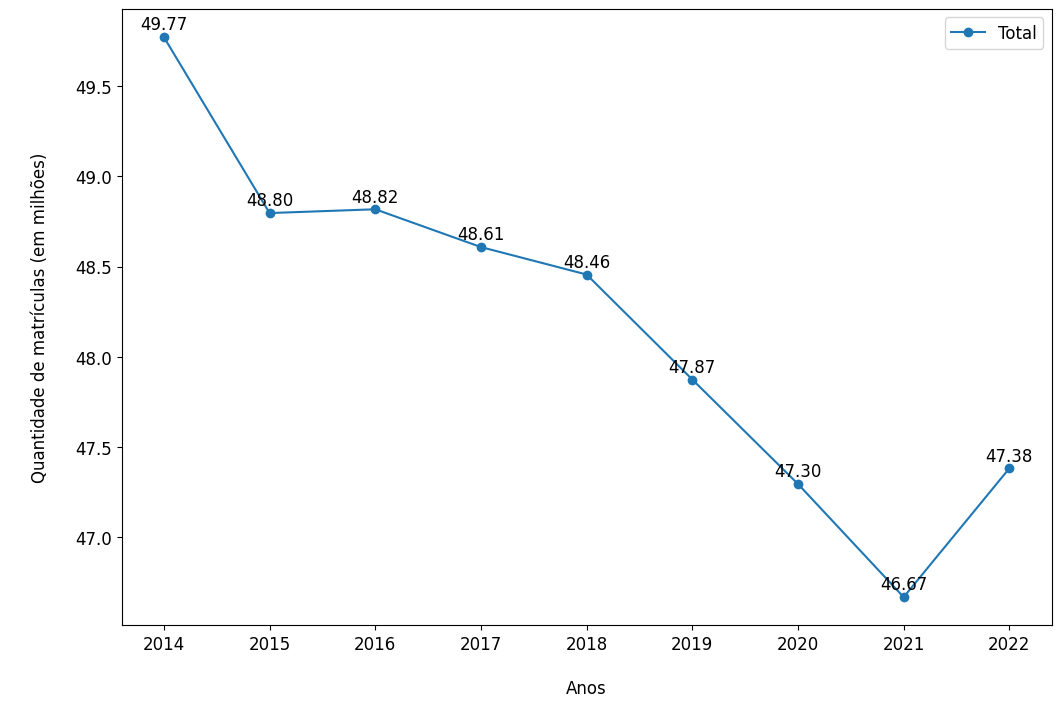

In [12]:
plt.figure(figsize=(12, 8))

plt.plot(anos, lista_dados_geral_mil, label = 'Total', marker = 'o')

altura_ajustada = 0.02

for i in range(len(anos)):
    plt.text(anos[i], lista_dados_geral_mil[i] + altura_ajustada, f'{lista_dados_geral_mil[i]:.2f}', ha='center', va='bottom', fontsize=12)

plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)
plt.ylabel('\nQuantidade de matrículas (em milhões)\n', fontsize = 12)
plt.legend(fontsize = 12)
# plt.title('\nQuantidade de matrículas de estudantes no ensino básico brasileiro por etapas da educação\n', fontsize = 18)
plt.show()

# COR E RAÇA

## Todas

In [11]:
lista_dados_branca = []
lista_dados_preta = []
lista_dados_parda = []
lista_dados_amarela = []
lista_dados_indigena = []
lista_dados_nao_declarado = []

for i in range(0, len(anos), 1):
#   lista_total_UDESC.append(dados[(dados['NU_ANO_CENSO'] == anos[i]) & (dados['CO_IES'] == 43) & (dados['TP_SITUACAO'] == 2)]['TP_SEXO'].count())
  lista_dados_branca.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_BAS_BRANCA'].sum())
  lista_dados_preta.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_BAS_PRETA'].sum())
  lista_dados_parda.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_BAS_PARDA'].sum())
  lista_dados_amarela.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_BAS_AMARELA'].sum())
  lista_dados_indigena.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_BAS_INDIGENA'].sum())
  lista_dados_nao_declarado.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_BAS_ND'].sum())

In [21]:
[ int(x) for x in  lista_dados_indigena]

[274517, 286994, 292705, 300705, 313698, 321175, 321199, 339182, 354115]

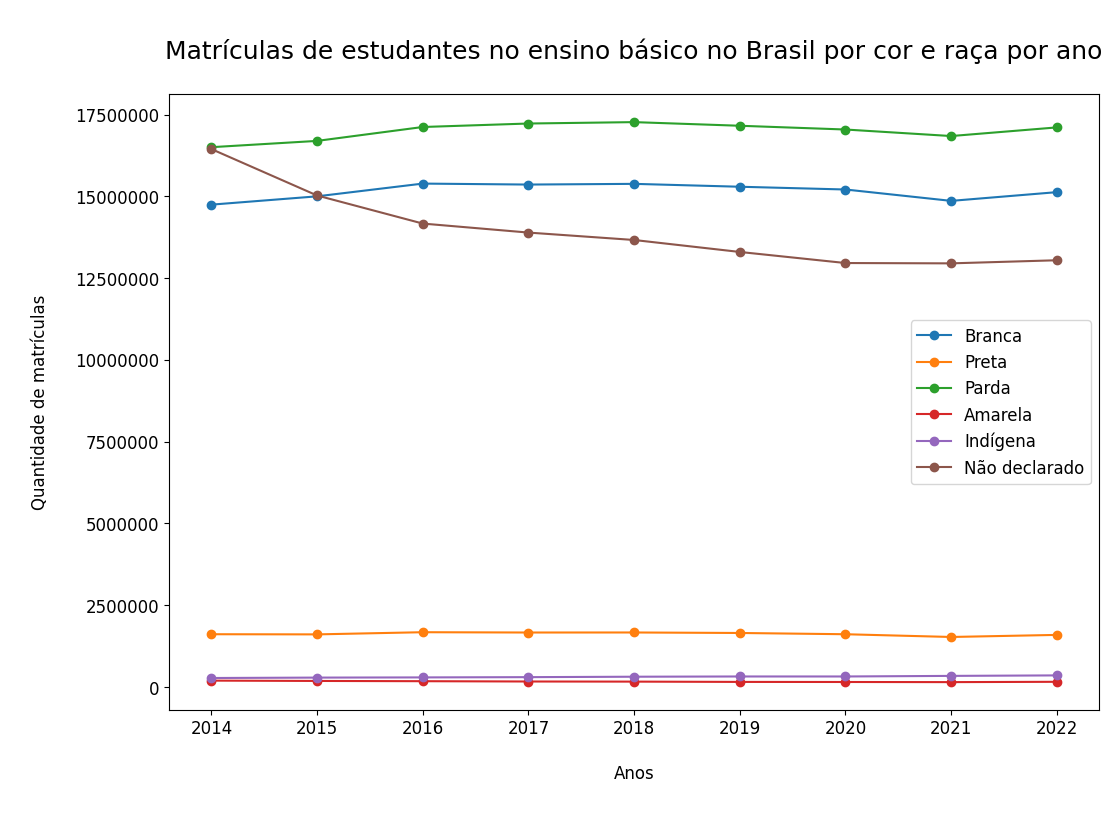

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(anos, lista_dados_branca, label = 'Branca', marker = 'o')
plt.plot(anos, lista_dados_preta, label = 'Preta', marker = 'o')
plt.plot(anos, lista_dados_parda, label = 'Parda', marker = 'o')
plt.plot(anos, lista_dados_amarela, label = 'Amarela', marker = 'o')
plt.plot(anos, lista_dados_indigena, label = 'Indígena', marker = 'o')
plt.plot(anos, lista_dados_nao_declarado, label = 'Não declarado', marker = 'o')

plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)
plt.ylabel('\nQuantidade de matrículas\n', fontsize = 12)
plt.legend(fontsize = 12)
plt.title('\nMatrículas de estudantes no ensino básico no Brasil por cor e raça por ano\n', fontsize = 18)
plt.show()

## Declarados Pretos

In [284]:
# Índices dos anos 2019 e 2021
indice_2019 = anos.index(2019)
indice_2022 = anos.index(2022)

# Valores correspondentes aos anos 2019 e 2021 nas listas
valor_2019_preta = lista_dados_preta[indice_2019]
valor_2022_preta = lista_dados_preta[indice_2022]

valor_2019_branca = lista_dados_branca[indice_2019]
valor_2022_branca = lista_dados_branca[indice_2022]

valor_2019_amarela = lista_dados_amarela[indice_2019]
valor_2022_amarela = lista_dados_amarela[indice_2022]

valor_2019_parda = lista_dados_parda[indice_2019]
valor_2022_parda = lista_dados_parda[indice_2022]

valor_2019_indigena = lista_dados_indigena[indice_2019]
valor_2022_indigena = lista_dados_indigena[indice_2022]

valor_2019_nao_declarada = lista_dados_nao_declarado[indice_2019]
valor_2022_nao_declarada = lista_dados_nao_declarado[indice_2022]

# Criação de um dicionário com as quedas percentuais
quedas_percentuais = {
    "Preta": ((valor_2022_preta - valor_2019_preta) / valor_2019_preta) * 100,
    "Branca": ((valor_2022_branca - valor_2019_branca) / valor_2019_branca) * 100,
    "Amarela": ((valor_2022_amarela - valor_2019_amarela) / valor_2019_amarela) * 100,
    "Parda": ((valor_2022_parda - valor_2019_parda) / valor_2019_parda) * 100,
    "Indígena": ((valor_2022_indigena - valor_2019_indigena) / valor_2019_indigena) * 100,
    "Não declarada": ((valor_2022_nao_declarada - valor_2019_nao_declarada) / valor_2019_nao_declarada) * 100,
}

# Ordenar o dicionário pelas quedas percentuais em ordem decrescente
quedas_percentuais_ordenadas = dict(sorted(quedas_percentuais.items(), key=lambda item: item[1], reverse=True))

# Imprimir as quedas percentuais do maior valor para o menor valor
for categoria, queda in quedas_percentuais_ordenadas.items():
    print(f"Queda percentual na categoria {categoria}: {queda:.2f}%")


Queda percentual na categoria Indígena: 10.26%
Queda percentual na categoria Amarela: 2.15%
Queda percentual na categoria Parda: -0.29%
Queda percentual na categoria Branca: -1.08%
Queda percentual na categoria Não declarada: -1.91%
Queda percentual na categoria Preta: -3.56%


In [285]:
import numpy as np

# Valores correspondentes aos anos 2019 e 2021 nas listas
valores_2019 = {
    "Preta": lista_dados_preta[indice_2019],
    "Branca": lista_dados_branca[indice_2019],
    "Amarela": lista_dados_amarela[indice_2019],
    "Parda": lista_dados_parda[indice_2019],
    "Indígena": lista_dados_indigena[indice_2019],
    "Não declarada": lista_dados_nao_declarado[indice_2019],
}

valores_2022 = {
    "Preta": lista_dados_preta[indice_2022],
    "Branca": lista_dados_branca[indice_2022],
    "Amarela": lista_dados_amarela[indice_2022],
    "Parda": lista_dados_parda[indice_2022],
    "Indígena": lista_dados_indigena[indice_2022],
    "Não declarada": lista_dados_nao_declarado[indice_2022],
}

# Cálculo do desvio padrão para cada categoria
desvios_padrao = {}

for categoria, valor_2019 in valores_2019.items():
    valor_2022 = valores_2022[categoria]
    desvio_padrao = np.std([valor_2019, valor_2022])
    desvios_padrao[categoria] = desvio_padrao

# Ordenar o dicionário pelo desvio padrão em ordem decrescente
desvios_padrao_ordenados = dict(sorted(desvios_padrao.items(), key=lambda item: item[1], reverse=True))

# Imprimir os desvios padrão do maior para o menor desvio padrão
for categoria, desvio in desvios_padrao_ordenados.items():
    print(f"Desvio padrão na categoria {categoria}: {desvio:.2f}")


Desvio padrão na categoria Não declarada: 126905.00
Desvio padrão na categoria Branca: 82752.00
Desvio padrão na categoria Preta: 29373.00
Desvio padrão na categoria Parda: 25193.00
Desvio padrão na categoria Indígena: 16470.00
Desvio padrão na categoria Amarela: 1667.00


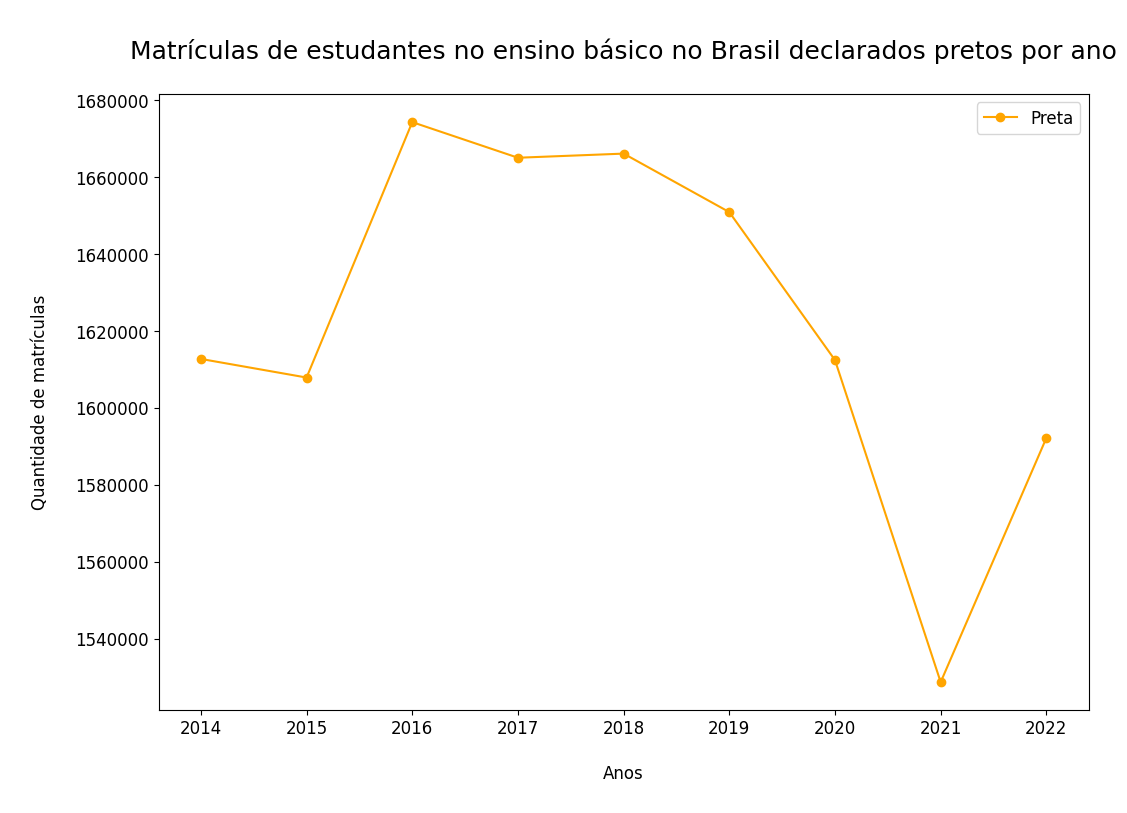

In [70]:
plt.figure(figsize=(12, 8))

# plt.plot(anos, lista_dados_branca, label = 'Branca', marker = 'o')
plt.plot(anos, lista_dados_preta, label = 'Preta', marker = 'o', color='orange')
# plt.plot(anos, lista_dados_parda, label = 'Parda', marker = 'o')
# plt.plot(anos, lista_dados_amarela, label = 'Amarela', marker = 'o', color='red')
# plt.plot(anos, lista_dados_indigena, label = 'Indígena', marker = 'o', color='purple')
# plt.plot(anos, lista_dados_nao_declarado, label = 'Não declarado', marker = 'o')

plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)
plt.ylabel('\nQuantidade de matrículas\n', fontsize = 12)
plt.legend(fontsize = 12)
plt.title('\nMatrículas de estudantes no ensino básico no Brasil declarados pretos por ano\n', fontsize = 18)
plt.show()

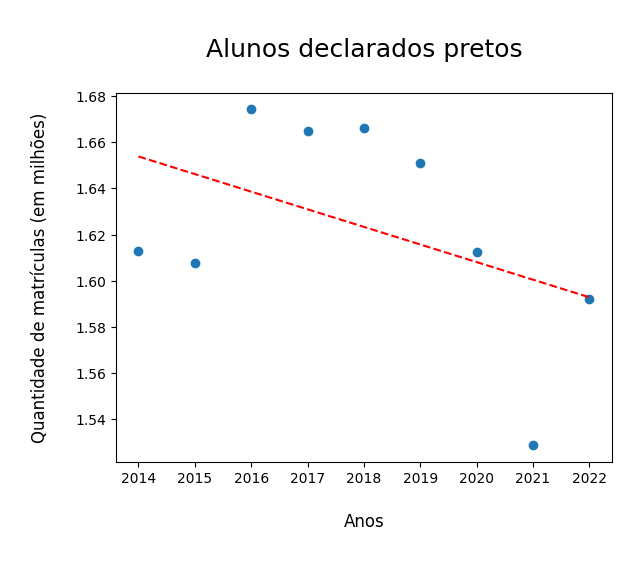

In [73]:
x = anos
y = []

for i in range(0, len(lista_dados_preta), 1):
  y.append(lista_dados_preta[i] / 1000000)

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.ylabel('\nQuantidade de matrículas (em milhões)\n', fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)

plt.title('\nAlunos declarados pretos\n', fontsize = 18)

plt.plot(x,p(x),"r--")

## Declarados Índigenas

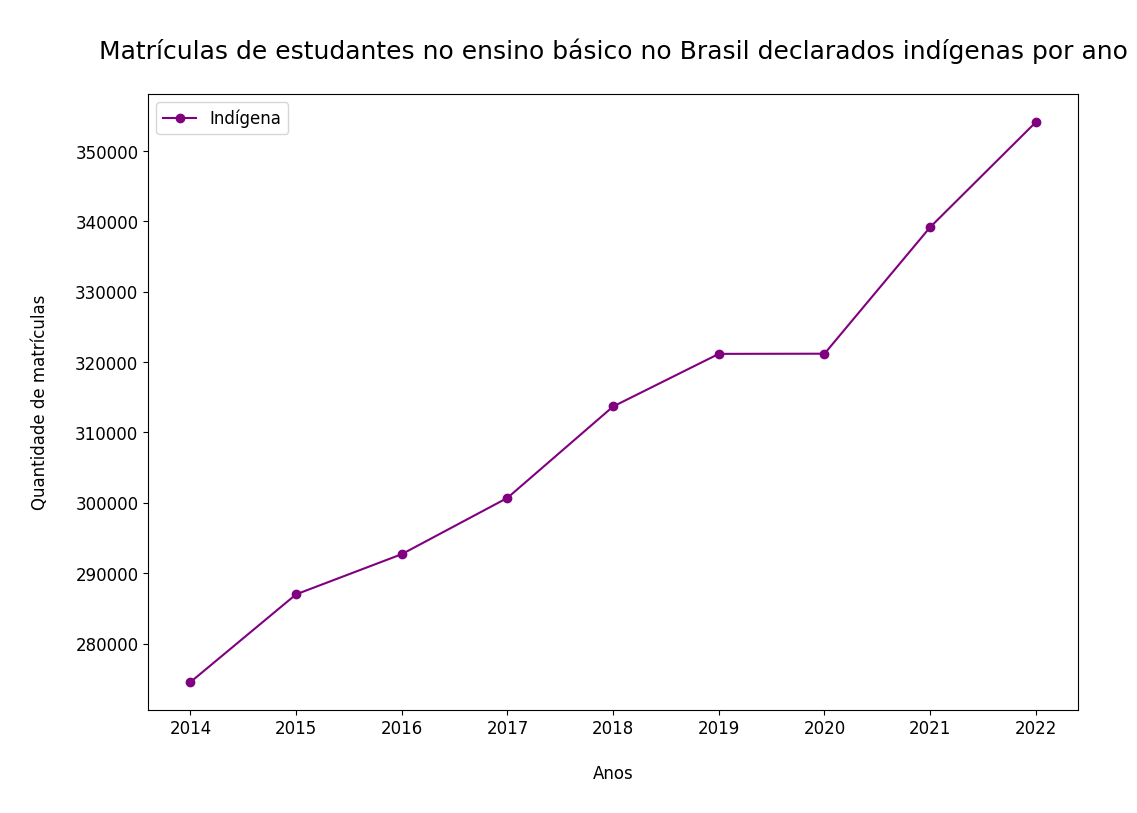

In [74]:
plt.figure(figsize=(12, 8))

# plt.plot(anos, lista_dados_branca, label = 'Branca', marker = 'o')
# plt.plot(anos, lista_dados_preta, label = 'Preta', marker = 'o', color='orange')
# plt.plot(anos, lista_dados_parda, label = 'Parda', marker = 'o')
# plt.plot(anos, lista_dados_amarela, label = 'Amarela', marker = 'o', color='red')
plt.plot(anos, lista_dados_indigena, label = 'Indígena', marker = 'o', color='purple')
# plt.plot(anos, lista_dados_nao_declarado, label = 'Não declarado', marker = 'o')

plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)
plt.ylabel('\nQuantidade de matrículas\n', fontsize = 12)
plt.legend(fontsize = 12)
plt.title('\nMatrículas de estudantes no ensino básico no Brasil declarados indígenas por ano\n', fontsize = 18)
plt.show()

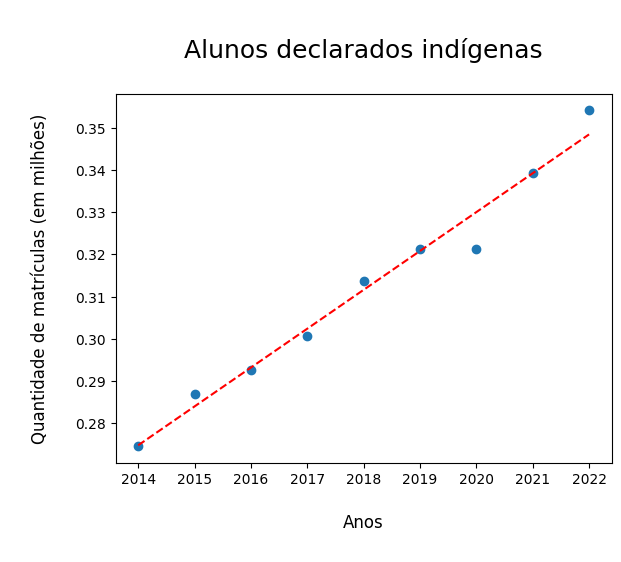

In [75]:
x = anos
y = []

for i in range(0, len(lista_dados_indigena), 1):
  y.append(lista_dados_indigena[i] / 1000000)

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.ylabel('\nQuantidade de matrículas (em milhões)\n', fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)

plt.title('\nAlunos declarados indígenas\n', fontsize = 18)

plt.plot(x,p(x),"r--")

## Declarados Amarelos

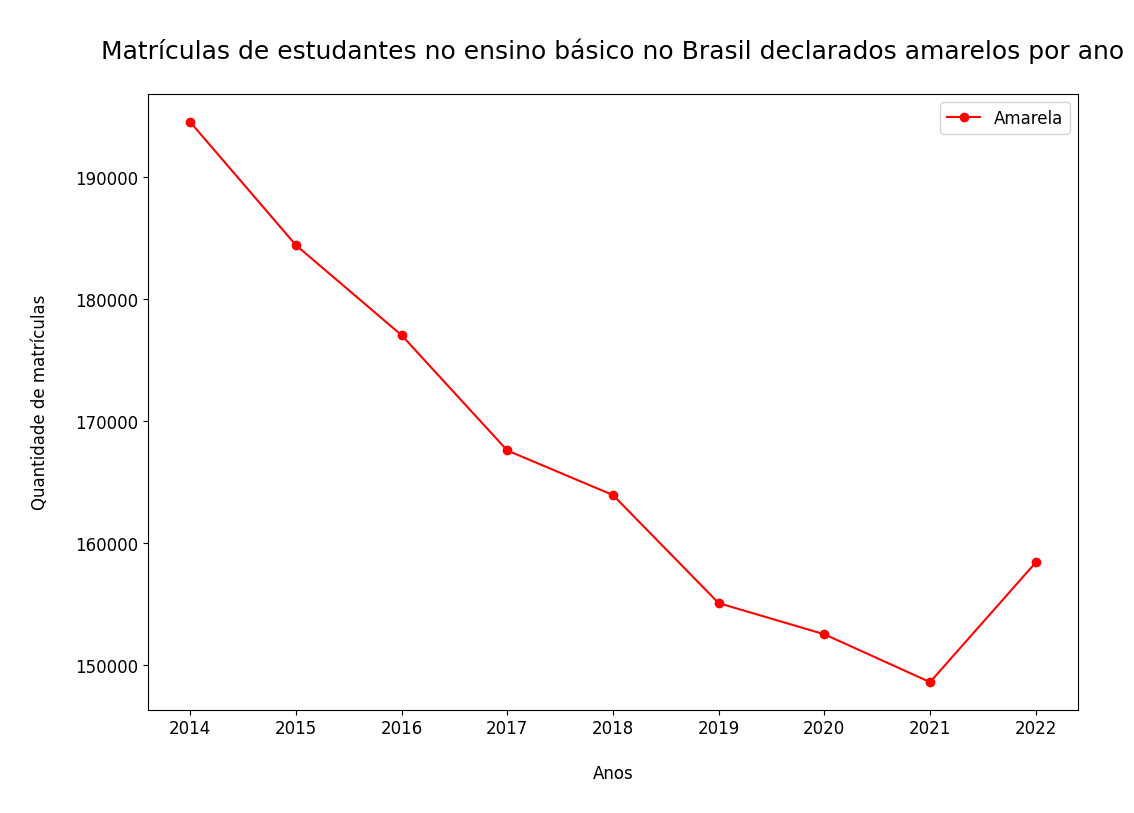

In [ ]:
plt.figure(figsize=(12, 8))

# plt.plot(anos, lista_dados_branca, label = 'Branca', marker = 'o')
# plt.plot(anos, lista_dados_preta, label = 'Preta', marker = 'o', color='orange')
# plt.plot(anos, lista_dados_parda, label = 'Parda', marker = 'o')
plt.plot(anos, lista_dados_amarela, label = 'Amarela', marker = 'o', color='red')
# plt.plot(anos, lista_dados_indigena, label = 'Indígena', marker = 'o', color='purple')
# plt.plot(anos, lista_dados_nao_declarado, label = 'Não declarado', marker = 'o')

plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)
plt.ylabel('\nQuantidade de matrículas\n', fontsize = 12)
plt.legend(fontsize = 12)
plt.title('\nMatrículas de estudantes no ensino básico no Brasil declarados amarelos por ano\n', fontsize = 18)
plt.show()

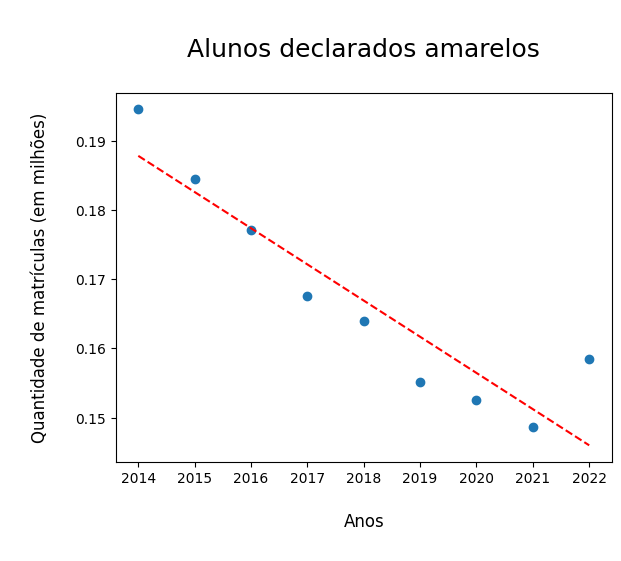

In [77]:
x = anos
y = []

for i in range(0, len(lista_dados_amarela), 1):
  y.append(lista_dados_amarela[i] / 1000000)

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.ylabel('\nQuantidade de matrículas (em milhões)\n', fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)

plt.title('\nAlunos declarados amarelos\n', fontsize = 18)

plt.plot(x,p(x),"r--")

## Declarados Pardos

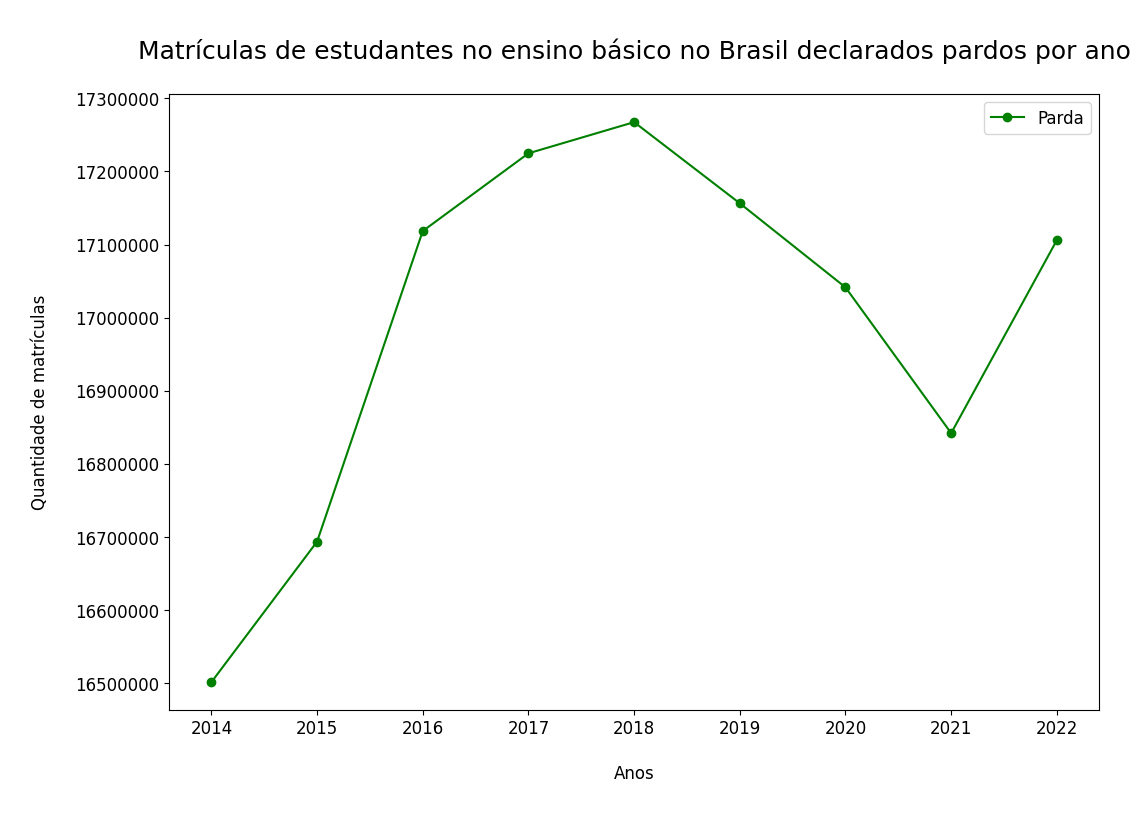

In [76]:
plt.figure(figsize=(12, 8))

# plt.plot(anos, lista_dados_branca, label = 'Branca', marker = 'o', color='blue')
# plt.plot(anos, lista_dados_preta, label = 'Preta', marker = 'o')
plt.plot(anos, lista_dados_parda, label = 'Parda', marker = 'o', color='green')
# plt.plot(anos, lista_dados_amarela, label = 'Amarela', marker = 'o')
# plt.plot(anos, lista_dados_indigena, label = 'Indígena', marker = 'o')
# plt.plot(anos, lista_dados_nao_declarado, label = 'Não declarado', marker = 'o')

plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)
plt.ylabel('\nQuantidade de matrículas\n', fontsize = 12)
plt.legend(fontsize = 12)
plt.title('\nMatrículas de estudantes no ensino básico no Brasil declarados pardos por ano\n', fontsize = 18)
plt.show()

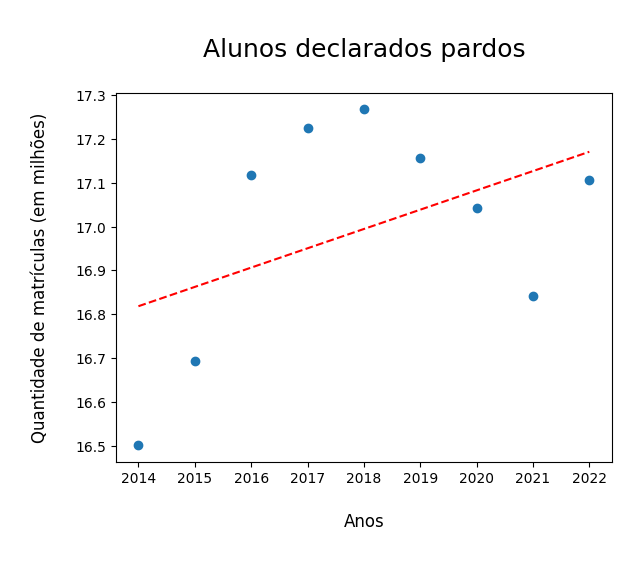

In [78]:
x = anos
y = []

for i in range(0, len(lista_dados_parda), 1):
  y.append(lista_dados_parda[i] / 1000000)

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.ylabel('\nQuantidade de matrículas (em milhões)\n', fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)

plt.title('\nAlunos declarados pardos\n', fontsize = 18)

plt.plot(x,p(x),"r--")

## Declarados Brancos

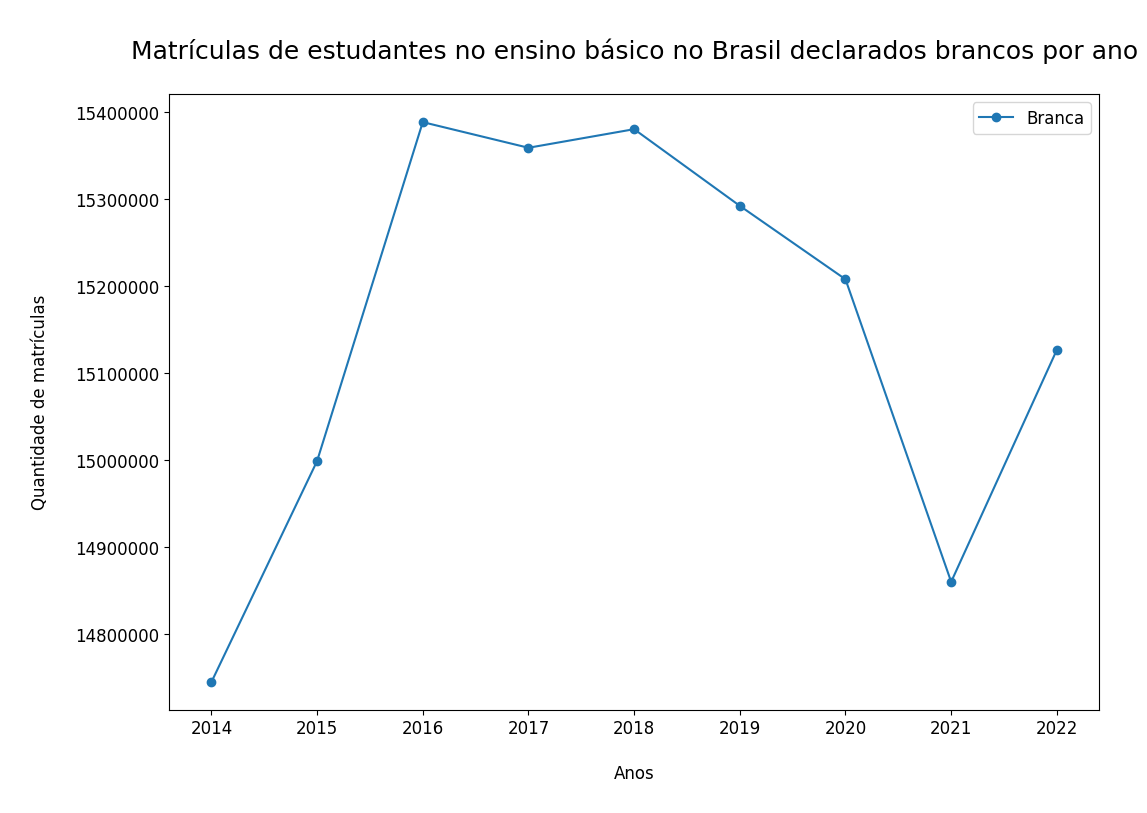

In [79]:
plt.figure(figsize=(12, 8))

plt.plot(anos, lista_dados_branca, label = 'Branca', marker = 'o')
# plt.plot(anos, lista_dados_preta, label = 'Preta', marker = 'o')
# plt.plot(anos, lista_dados_parda, label = 'Parda', marker = 'o', color='green')
# plt.plot(anos, lista_dados_amarela, label = 'Amarela', marker = 'o')
# plt.plot(anos, lista_dados_indigena, label = 'Indígena', marker = 'o')
# plt.plot(anos, lista_dados_nao_declarado, label = 'Não declarado', marker = 'o')

plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)
plt.ylabel('\nQuantidade de matrículas\n', fontsize = 12)
plt.legend(fontsize = 12)
plt.title('\nMatrículas de estudantes no ensino básico no Brasil declarados brancos por ano\n', fontsize = 18)
plt.show()

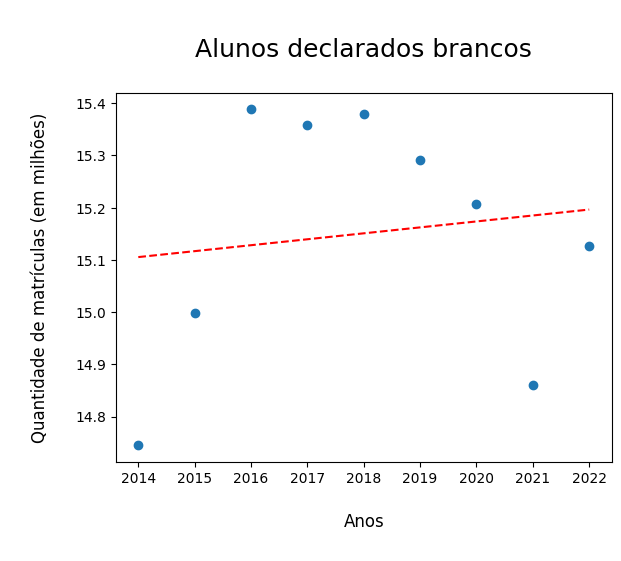

In [65]:
import numpy as np

x = anos
y = []

for i in range(0, len(lista_dados_branca), 1):
  y.append(lista_dados_branca[i] / 1000000)

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.ylabel('\nQuantidade de matrículas (em milhões)\n', fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)

plt.title('\nAlunos declarados brancos\n', fontsize = 18)

plt.plot(x,p(x),"r--")

## Não Declarados

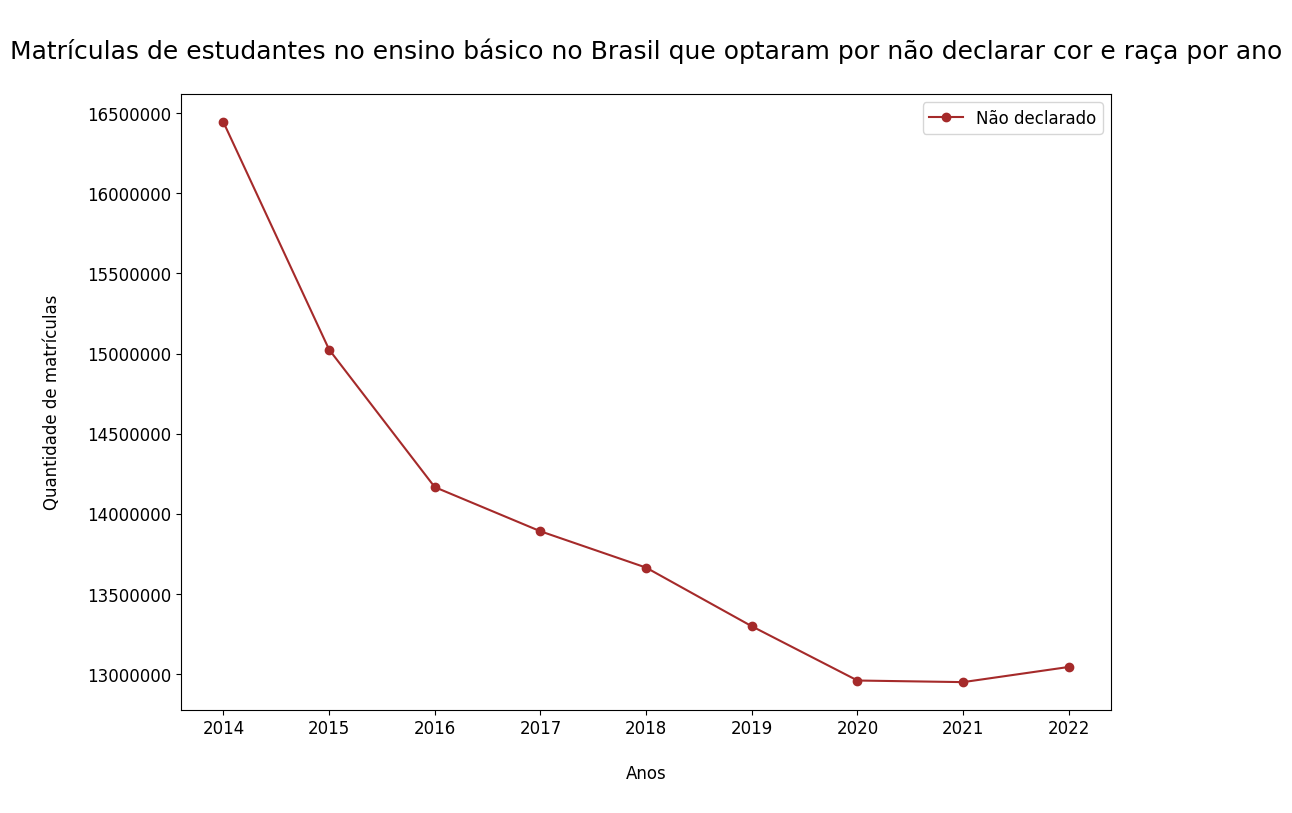

In [ ]:
plt.figure(figsize=(12, 8))

# plt.plot(anos, lista_dados_branca, label = 'Branca', marker = 'o')
# plt.plot(anos, lista_dados_preta, label = 'Preta', marker = 'o')
# plt.plot(anos, lista_dados_parda, label = 'Parda', marker = 'o')
# plt.plot(anos, lista_dados_amarela, label = 'Amarela', marker = 'o')
# plt.plot(anos, lista_dados_indigena, label = 'Indígena', marker = 'o')
plt.plot(anos, lista_dados_nao_declarado, label = 'Não declarado', marker = 'o', color='brown')

plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)
plt.ylabel('\nQuantidade de matrículas\n', fontsize = 12)
plt.legend(fontsize = 12)
plt.title('\nMatrículas de estudantes no ensino básico no Brasil que optaram por não declarar cor e raça por ano\n', fontsize = 18)
plt.show()

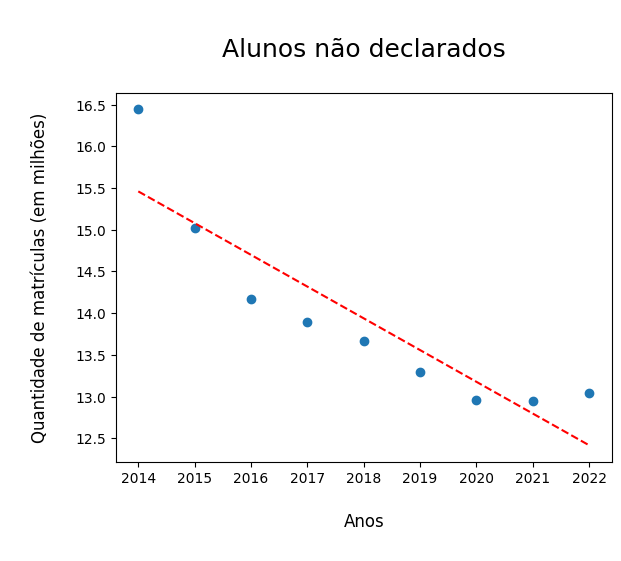

In [68]:
import numpy as np

x = anos
y = []

for i in range(0, len(lista_dados_nao_declarado), 1):
  y.append(lista_dados_nao_declarado[i] / 1000000)

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.ylabel('\nQuantidade de matrículas (em milhões)\n', fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)

plt.title('\nAlunos não declarados\n', fontsize = 18)

plt.plot(x,p(x),"r--")

# IDADE

In [150]:
# dataframe_inteiro[['QT_MAT_BAS_0_3','QT_MAT_BAS_4_5','QT_MAT_BAS_6_10','QT_MAT_BAS_11_14','QT_MAT_BAS_15_17','QT_MAT_BAS_18_MAIS']].mean().plot(kind='bar')

lista_dados_0_3 = []
lista_dados_4_5 = []
lista_dados_6_10 = []
lista_dados_11_14 = []
lista_dados_15_17 = []
lista_dados_18_MAIS = []

for i in range(0, len(anos), 1):
  lista_dados_0_3.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_BAS_0_3'].sum())
  lista_dados_4_5.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_BAS_4_5'].sum())
  lista_dados_6_10.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_BAS_6_10'].sum())
  lista_dados_11_14.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_BAS_11_14'].sum())
  lista_dados_15_17.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_BAS_15_17'].sum())
  lista_dados_18_MAIS.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_BAS_18_MAIS'].sum())

In [151]:
lista_dados_0_3_mil = []
lista_dados_4_5_mil = []
lista_dados_6_10_mil = []
lista_dados_11_14_mil = []
lista_dados_15_17_mil = []
lista_dados_18_MAIS_mil = []

for i in range(0, len(anos), 1):
    lista_dados_0_3_mil.append(lista_dados_0_3[i] / 1000000)
    lista_dados_4_5_mil.append(lista_dados_4_5[i] / 1000000)
    lista_dados_6_10_mil.append(lista_dados_6_10[i] / 1000000)
    lista_dados_11_14_mil.append(lista_dados_11_14[i] / 1000000)
    lista_dados_15_17_mil.append(lista_dados_15_17[i] / 1000000)
    lista_dados_18_MAIS_mil.append(lista_dados_18_MAIS[i] / 1000000)

In [152]:
lista_dados_0_3_mil

[2.980327,
 3.115834,
 3.255272,
 3.411841,
 3.580189,
 3.645104,
 3.46339,
 3.194854,
 3.655291]

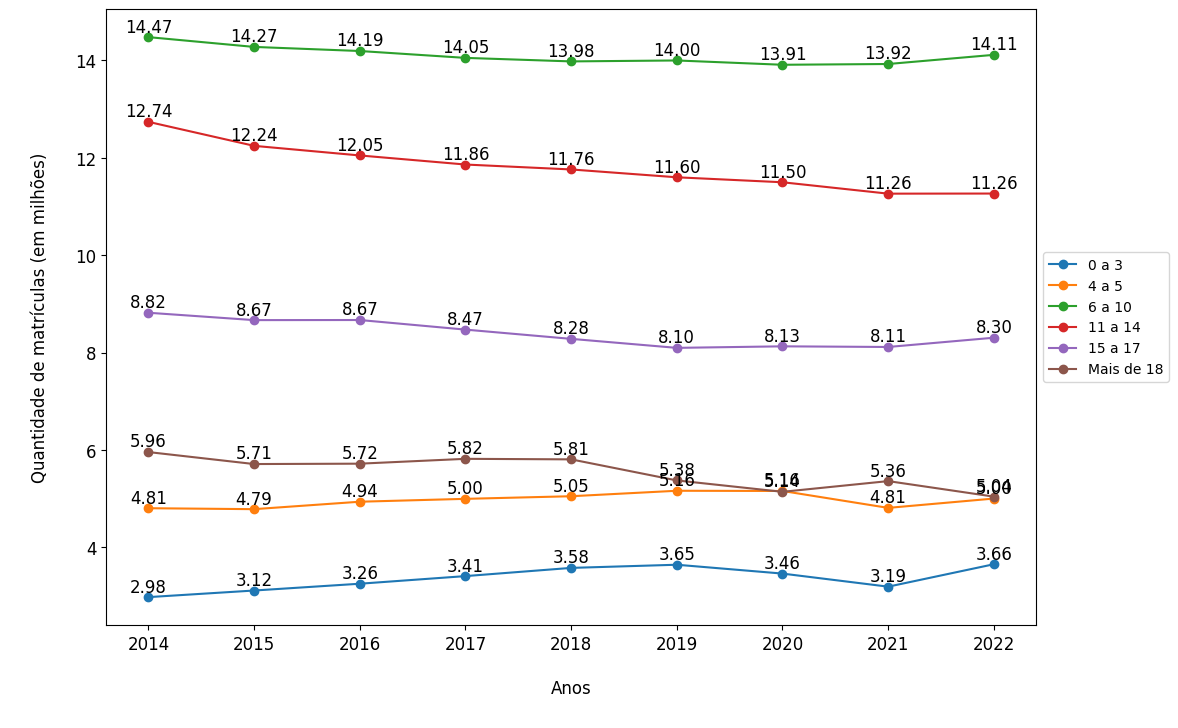

In [156]:
plt.figure(figsize=(12, 8))

plt.plot(anos, lista_dados_0_3_mil, label = '0 a 3', marker = 'o')
plt.plot(anos, lista_dados_4_5_mil, label = '4 a 5', marker = 'o')
plt.plot(anos, lista_dados_6_10_mil, label = '6 a 10', marker = 'o')
plt.plot(anos, lista_dados_11_14_mil, label = '11 a 14', marker = 'o')
plt.plot(anos, lista_dados_15_17_mil, label = '15 a 17', marker = 'o')
plt.plot(anos, lista_dados_18_MAIS_mil, label = 'Mais de 18', marker = 'o')

altura_ajustada = 0.03

for i in range(len(anos)):
    plt.text(anos[i], lista_dados_0_3_mil[i] + altura_ajustada, f'{lista_dados_0_3_mil[i]:.2f}', ha='center', va='bottom', fontsize=12)
    plt.text(anos[i], lista_dados_4_5_mil[i] + altura_ajustada, f'{lista_dados_4_5_mil[i]:.2f}', ha='center', va='bottom', fontsize=12)
    plt.text(anos[i], lista_dados_6_10_mil[i] + altura_ajustada, f'{lista_dados_6_10_mil[i]:.2f}', ha='center', va='bottom', fontsize=12)
    plt.text(anos[i], lista_dados_11_14_mil[i] + altura_ajustada, f'{lista_dados_11_14_mil[i]:.2f}', ha='center', va='bottom', fontsize=12)
    plt.text(anos[i], lista_dados_15_17_mil[i] + altura_ajustada, f'{lista_dados_15_17_mil[i]:.2f}', ha='center', va='bottom', fontsize=12)
    plt.text(anos[i], lista_dados_18_MAIS_mil[i] + altura_ajustada, f'{lista_dados_18_MAIS_mil[i]:.2f}', ha='center', va='bottom', fontsize=12)

leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('\nAnos\n', fontsize=12)
plt.ylabel('\nQuantidade de matrículas (em milhões)\n', fontsize=12)

plt.show()

# ETAPAS

In [160]:
# dataframe_inteiro[['QT_MAT_BAS','QT_MAT_INF','QT_MAT_FUND','QT_MAT_MED']].mean().plot(kind='bar')

lista_dados_infantil = []
lista_dados_fundamental = []
lista_dados_medio = []
lista_dados_eja = []

for i in range(0, len(anos), 1):
#   lista_dados_0_3.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_BAS'].sum())
  lista_dados_infantil.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_INF'].sum())
  lista_dados_fundamental.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_FUND'].sum())
  lista_dados_medio.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_MED'].sum())
  lista_dados_eja.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_EJA'].sum())

In [161]:
lista_dados_infantil_mil = []
lista_dados_fundamental_mil = []
lista_dados_medio_mil = []
lista_dados_eja_mil = []

for i in range(0, len(anos), 1):
    lista_dados_infantil_mil.append(lista_dados_0_3[i] / 1000000)
    lista_dados_fundamental_mil.append(lista_dados_4_5[i] / 1000000)
    lista_dados_medio_mil.append(lista_dados_6_10[i] / 1000000)
    lista_dados_eja_mil.append(lista_dados_11_14[i] / 1000000)

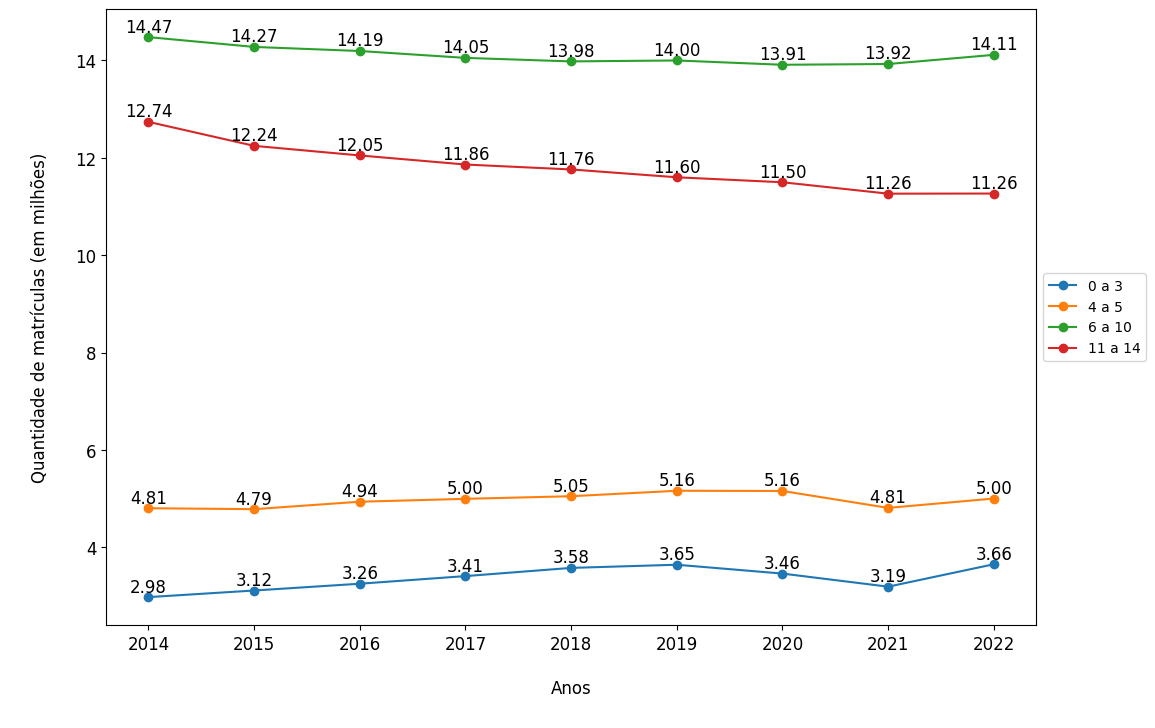

In [163]:
plt.figure(figsize=(12, 8))

plt.plot(anos, lista_dados_infantil_mil, label = '0 a 3', marker = 'o')
plt.plot(anos, lista_dados_fundamental_mil, label = '4 a 5', marker = 'o')
plt.plot(anos, lista_dados_medio_mil, label = '6 a 10', marker = 'o')
plt.plot(anos, lista_dados_eja_mil, label = '11 a 14', marker = 'o')

altura_ajustada = 0.03

for i in range(len(anos)):
    plt.text(anos[i], lista_dados_infantil_mil[i] + altura_ajustada, f'{lista_dados_infantil_mil[i]:.2f}', ha='center', va='bottom', fontsize=12)
    plt.text(anos[i], lista_dados_fundamental_mil[i] + altura_ajustada, f'{lista_dados_fundamental_mil[i]:.2f}', ha='center', va='bottom', fontsize=12)
    plt.text(anos[i], lista_dados_medio_mil[i] + altura_ajustada, f'{lista_dados_medio_mil[i]:.2f}', ha='center', va='bottom', fontsize=12)
    plt.text(anos[i], lista_dados_eja_mil[i] + altura_ajustada, f'{lista_dados_eja_mil[i]:.2f}', ha='center', va='bottom', fontsize=12)

leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('\nAnos\n', fontsize=12)
plt.ylabel('\nQuantidade de matrículas (em milhões)\n', fontsize=12)

plt.show()

<Figure size 1200x800 with 0 Axes>

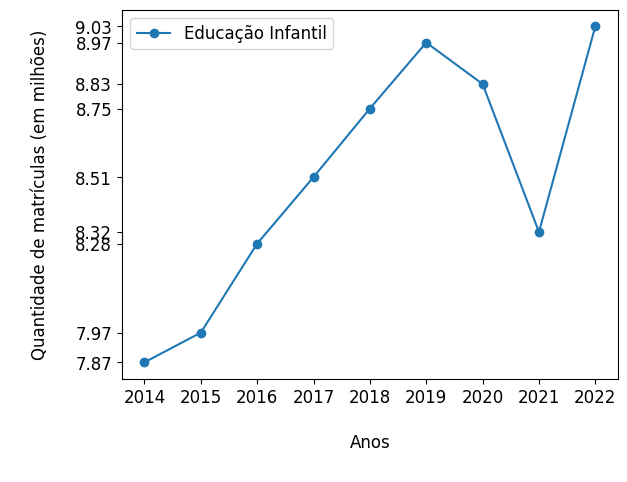

In [164]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 8))

fig, ax = plt.subplots()

ax.plot(anos, lista_dados_infantil, label = 'Educação Infantil', marker = 'o')
# plt.plot(anos, lista_dados_fundamental, label = 'Ensino Fundamental', marker = 'o', color='orange')
# plt.plot(anos, lista_dados_medio, label = 'Ensino Médio', marker = 'o')
# plt.plot(anos, lista_dados_eja, label = 'Educação Jovens e Adultos', marker = 'o')

def millions_formatter(x, pos):
    mil = x / 1000000
    return '{0:.2f}'.format(mil)

y = []

for i in range(0, len(anos), 1):
    y.append(lista_dados_infantil[i])

plt.ticklabel_format(style='plain', axis='y')
plt.yticks(y, fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.ylabel('\nQuantidade de matrículas (em milhões)\n', fontsize = 12)
plt.legend(fontsize = 12)
# plt.title('\nQuantidade de matrículas de estudantes no ensino básico brasileiro por etapas da educação\n', fontsize = 18)
plt.show()

<Figure size 1200x800 with 0 Axes>

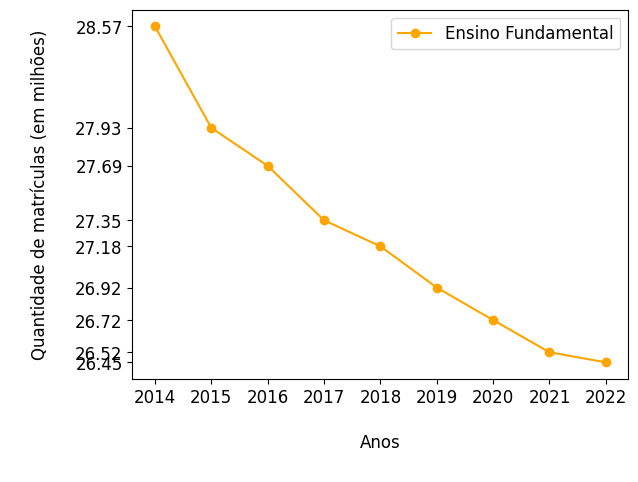

In [165]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 8))

fig, ax = plt.subplots()

# ax.plot(anos, lista_dados_infantil, label = 'Educação Infantil', marker = 'o')
plt.plot(anos, lista_dados_fundamental, label = 'Ensino Fundamental', marker = 'o', color='orange')
# plt.plot(anos, lista_dados_medio, label = 'Ensino Médio', marker = 'o')
# plt.plot(anos, lista_dados_eja, label = 'Educação Jovens e Adultos', marker = 'o')

def millions_formatter(x, pos):
    mil = x / 1000000
    return '{0:.2f}'.format(mil)

y = []

for i in range(0, len(anos), 1):
    y.append(lista_dados_fundamental[i])

plt.ticklabel_format(style='plain', axis='y')
plt.yticks(y, fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.ylabel('\nQuantidade de matrículas (em milhões)\n', fontsize = 12)
plt.legend(fontsize = 12)
# plt.title('\nQuantidade de matrículas de estudantes no ensino básico brasileiro por etapas da educação\n', fontsize = 18)
plt.show()

<Figure size 1200x800 with 0 Axes>

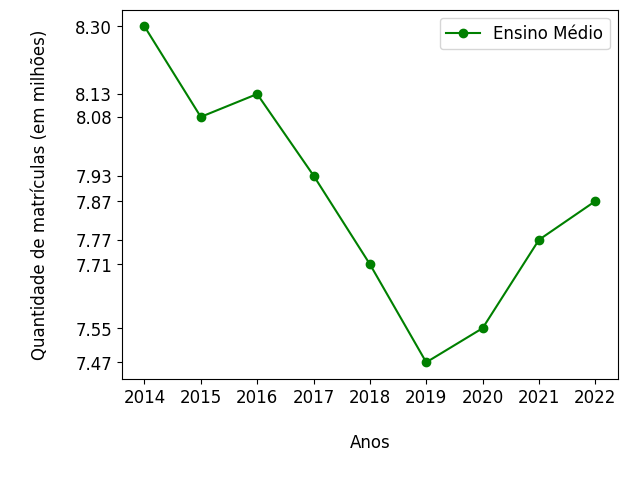

In [45]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 8))

fig, ax = plt.subplots()

# ax.plot(anos, lista_dados_infantil, label = 'Educação Infantil', marker = 'o')
# plt.plot(anos, lista_dados_fundamental, label = 'Ensino Fundamental', marker = 'o')
plt.plot(anos, lista_dados_medio, label = 'Ensino Médio', marker = 'o', color='green')
# plt.plot(anos, lista_dados_eja, label = 'Educação Jovens e Adultos', marker = 'o')

def millions_formatter(x, pos):
    mil = x / 1000000
    return '{0:.2f}'.format(mil)

y = []

for i in range(0, len(anos), 1):
    y.append(lista_dados_medio[i])

plt.ticklabel_format(style='plain', axis='y')
plt.yticks(y, fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.ylabel('\nQuantidade de matrículas (em milhões)\n', fontsize = 12)
plt.legend(fontsize = 12)
# plt.title('\nQuantidade de matrículas de estudantes no ensino básico brasileiro por etapas da educação\n', fontsize = 18)
plt.show()

<Figure size 1200x800 with 0 Axes>

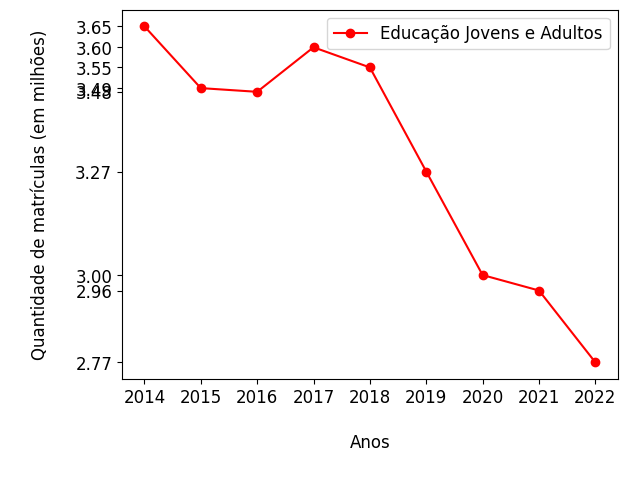

In [46]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 8))

fig, ax = plt.subplots()

# ax.plot(anos, lista_dados_infantil, label = 'Educação Infantil', marker = 'o')
# plt.plot(anos, lista_dados_fundamental, label = 'Ensino Fundamental', marker = 'o')
# plt.plot(anos, lista_dados_medio, label = 'Ensino Médio', marker = 'o')
plt.plot(anos, lista_dados_eja, label = 'Educação Jovens e Adultos', marker = 'o', color='red')

def millions_formatter(x, pos):
    mil = x / 1000000
    return '{0:.2f}'.format(mil)

y = []

for i in range(0, len(anos), 1):
    y.append(lista_dados_eja[i])

plt.ticklabel_format(style='plain', axis='y')
plt.yticks(y, fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.ylabel('\nQuantidade de matrículas (em milhões)\n', fontsize = 12)
plt.legend(fontsize = 12)
# plt.title('\nQuantidade de matrículas de estudantes no ensino básico brasileiro por etapas da educação\n', fontsize = 18)
plt.show()

# SEXO

## Geral

In [111]:
# dataframe_inteiro[['QT_MAT_BAS','QT_MAT_INF','QT_MAT_FUND','QT_MAT_MED']].mean().plot(kind='bar')

lista_dados_feminino = []
lista_dados_masculino = []

for i in range(0, len(anos), 1):
#   lista_dados_0_3.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_BAS'].sum())
  lista_dados_feminino.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_BAS_FEM'].sum())
  lista_dados_masculino.append(dataframe_inteiro[(dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_BAS_MASC'].sum())

In [112]:
lista_dados_feminino_mil = []
lista_dados_masculino_mil = []

for i in range(0, len(anos), 1):
    lista_dados_feminino_mil.append(lista_dados_feminino[i] / 1000000)
    lista_dados_masculino_mil.append(lista_dados_masculino[i] / 1000000)

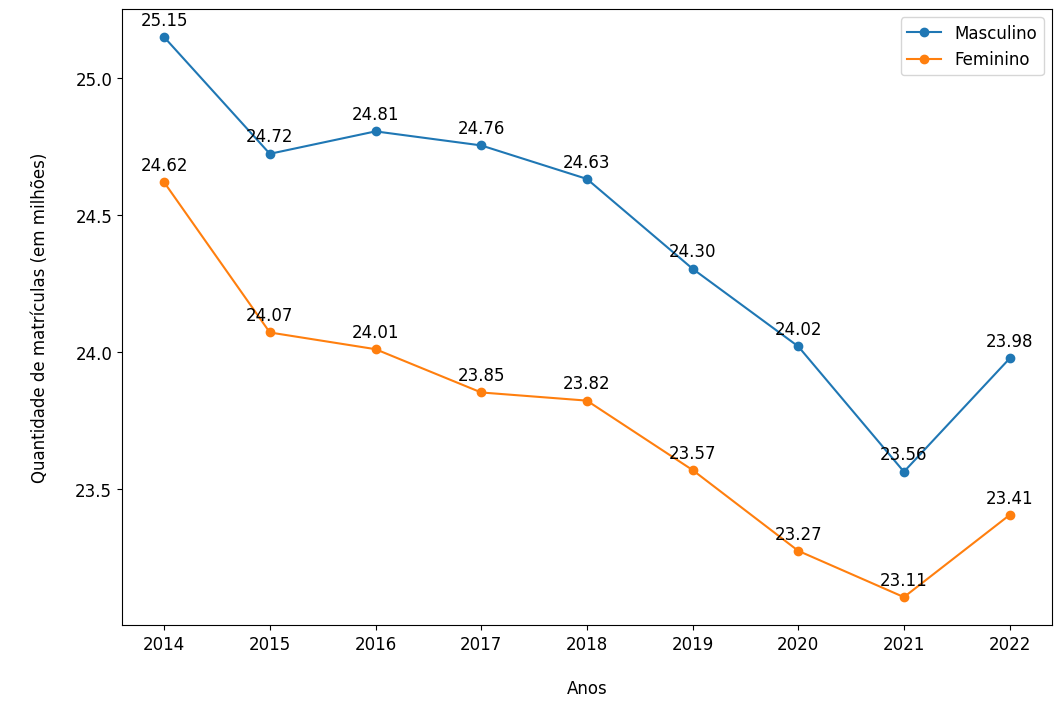

In [265]:
plt.figure(figsize=(12, 8))

plt.plot(anos, lista_dados_masculino_mil, label = 'Masculino', marker = 'o')
plt.plot(anos, lista_dados_feminino_mil, label = 'Feminino', marker = 'o')

altura_ajustada = 0.03

for i in range(len(anos)):
    plt.text(anos[i], lista_dados_masculino_mil[i] + altura_ajustada, f'{lista_dados_masculino_mil[i]:.2f}', ha='center', va='bottom', fontsize=12)
    plt.text(anos[i], lista_dados_feminino_mil[i] + altura_ajustada, f'{lista_dados_feminino_mil[i]:.2f}', ha='center', va='bottom', fontsize=12)

plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)
plt.ylabel('\nQuantidade de matrículas (em milhões)\n', fontsize = 12)
plt.legend(fontsize = 12)
# plt.title('\nQuantidade de matrículas de estudantes no ensino básico brasileiro por etapas da educação\n', fontsize = 18)
plt.show()

# TIPO DE ESCOLA

In [254]:
dataframe_inteiro.TP_CATEGORIA_ESCOLA_PRIVADA.isnull().sum()

1719215

In [256]:
lista_dados_publica = []

for i in range(0, len(anos), 1):
    lista_dados_publica.append(dataframe_inteiro.loc[(dataframe_inteiro['TP_DEPENDENCIA'] < 4) & (dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_BAS'].sum())

In [257]:
lista_dados_particular = []

for i in range(0, len(anos), 1):
    lista_dados_particular.append(dataframe_inteiro.loc[(dataframe_inteiro['TP_DEPENDENCIA'] == 4) & (dataframe_inteiro['NU_ANO_CENSO'] == anos[i])]['QT_MAT_BAS'].sum())

In [258]:
dataframe_priv_vs_pub = pd.concat([pd.DataFrame(lista_dados_publica), pd.DataFrame(lista_dados_particular)])

In [259]:
print(lista_dados_publica)
print(lista_dados_particular)

[40680590.0, 39738780.0, 39834378.0, 39721032.0, 39460618.0, 38739461.0, 38504108.0, 38532056.0, 38382028.0]
[9090781.0, 9057732.0, 8983101.0, 8887061.0, 8995249.0, 9134785.0, 8791186.0, 8136345.0, 9000046.0]


In [260]:
lista_total = []

for i in range(0, len(anos), 1):
    lista_total.append(lista_dados_publica[i] + lista_dados_particular[i])

for i in range(0, len(anos), 1):
    lista_dados_publica[i] = lista_dados_publica[i] *100 / lista_total[i]
    lista_dados_particular[i] = lista_dados_particular[i]* 100 / lista_total[i]

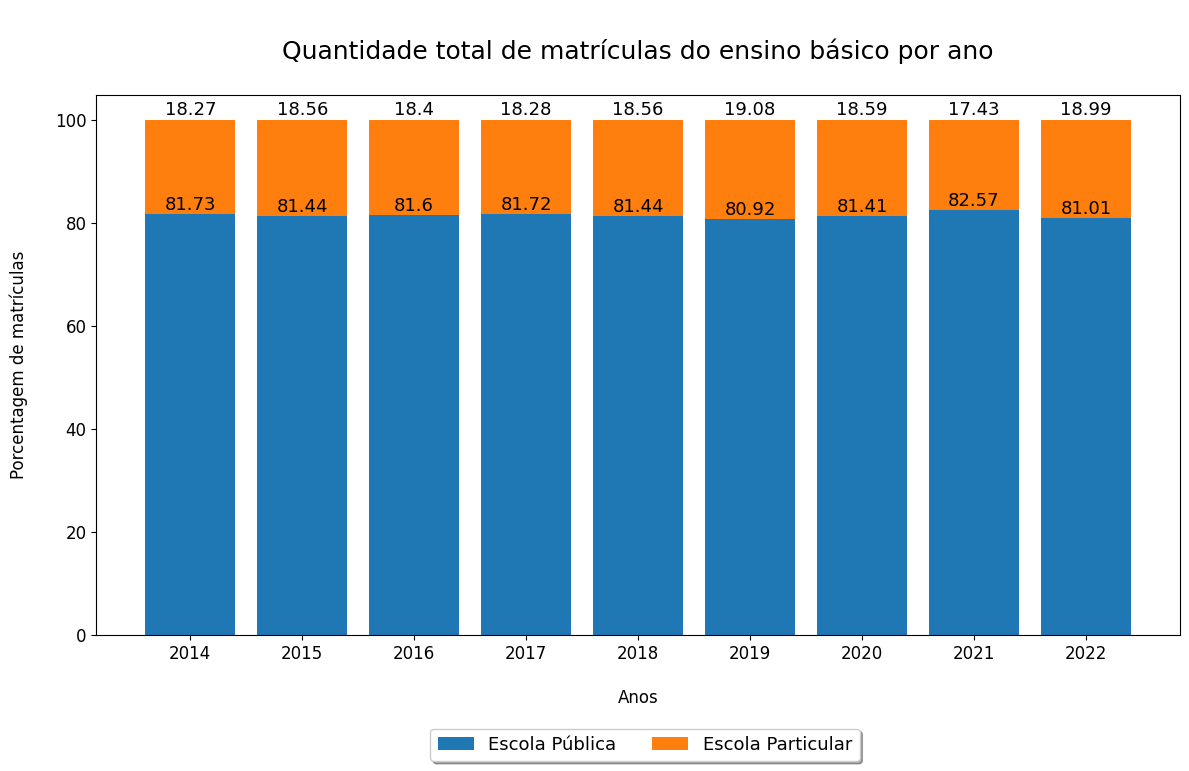

In [261]:
plt.figure(figsize=(12, 8))

ax_publica = plt.bar(anos, lista_dados_publica, label = 'Escola Pública')
ax_particular = plt.bar(anos, lista_dados_particular, label = 'Escola Particular', bottom=lista_dados_publica)

for p in ax_publica.patches:
    plt.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2, p.get_height() + 0.8), ha='center', fontsize=13)

for p in ax_particular.patches:
    plt.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2, 101), ha='center', fontsize=13)



plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 12)
plt.xticks(anos, fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)
plt.ylabel('Porcentagem de matrículas\n', fontsize = 12)
plt.legend(loc='lower left', bbox_to_anchor=(0.3,-0.25), shadow=True, ncol=2, prop={'size': 13})
plt.title('\nQuantidade total de matrículas do ensino básico por ano\n', fontsize = 18)



plt.tight_layout()
plt.show()

# CIDADES (HEATMAP)

In [167]:
dataframe_inteiro_teste = pd.concat(vetor_dataframes)

In [168]:
numero_matriculas_por_municipio = dataframe_inteiro_teste.filter(items=[
    'NU_ANO_CENSO',
    'NO_ENTIDADE',
    'QT_MAT_BAS',
    'NO_REGIAO',
    'CO_REGIAO',
    'NO_UF',
    'SG_UF',
    'CO_UF',
    'NO_MUNICIPIO',
    'CO_MUNICIPIO',
])

numero_matriculas_por_municipio

NU_ANO_CENSO                          NO_ENTIDADE  QT_MAT_BAS  \
0               2014                EIEEF HAP BITT TUPARI         9.0   
1               2014             CEEJA LUIZ VAZ DE CAMOES       522.0   
2               2014                 EMMEF 07 DE SETEMBRO        34.0   
3               2014           EMMEF AFONSO AURELIO PORTO         NaN   
4               2014                      EMEIEF ANA NERY       120.0   
...              ...                                  ...         ...   
224644          2022                    CED VITORIA REGIA       191.0   
224645          2022            CED SANTOS DUMONT - CESAN         NaN   
224646          2022                            INST MAUA         NaN   
224647          2022                              CEUBRAS         NaN   
224648          2022  OBRA SOCIAL NOSSA SENHORA DE FATIMA         NaN   

           NO_REGIAO  CO_REGIAO             NO_UF SG_UF  CO_UF  \
0              Norte          1          Rondônia    RO     11   
1              Norte          1          Rondônia    RO     11   
2              Norte          1          Rondônia    RO     11   
3              Norte          1          Rondônia    RO     11   
4              Norte          1          Rondônia    RO     11   
...              ...        ...               ...   ...    ...   
224644  Centro-Oeste          5  Distrito Federal    DF     53   
224645  Centro-Oeste          5  Distrito Federal    DF     53   
224646  Centro-Oeste          5  Distrito Federal    DF     53   
224647  Centro-Oeste          5  Distrito Federal    DF     53   
224648  Centro-Oeste          5  Distrito Federal    DF     53   

                 NO_MUNICIPIO  CO_MUNICIPIO  
0       Alta Floresta D'Oeste       1100015  
1       Alta Floresta D'Oeste       1100015  
2       Alta Floresta D'Oeste       1100015  
3       Alta Floresta D'Oeste       1100015  
4       Alta Floresta D'Oeste       1100015  
...                       ...           ...  
224644               Brasília       5300108  
224645               Brasília       5300108  
224646               Brasília       5300108  
224647               Brasília       5300108  
224648               Brasília       5300108  

[2089794 rows x 10 columns]

In [216]:
df = pd.merge(numero_matriculas_por_municipio, municipios, how='left', left_on='CO_MUNICIPIO', right_on='codigo_ibge')
df.fillna(0, inplace=True)
df = df.drop(columns=['NO_ENTIDADE'])
df

NU_ANO_CENSO  QT_MAT_BAS     NO_REGIAO  CO_REGIAO             NO_UF  \
0                2014         9.0         Norte          1          Rondônia   
1                2014       522.0         Norte          1          Rondônia   
2                2014        34.0         Norte          1          Rondônia   
3                2014         0.0         Norte          1          Rondônia   
4                2014       120.0         Norte          1          Rondônia   
...               ...         ...           ...        ...               ...   
2089789          2022       191.0  Centro-Oeste          5  Distrito Federal   
2089790          2022         0.0  Centro-Oeste          5  Distrito Federal   
2089791          2022         0.0  Centro-Oeste          5  Distrito Federal   
2089792          2022         0.0  Centro-Oeste          5  Distrito Federal   
2089793          2022         0.0  Centro-Oeste          5  Distrito Federal   

        SG_UF  CO_UF           NO_MUNICIPIO  CO_MUNICIPIO  codigo_ibge  \
0          RO     11  Alta Floresta D'Oeste       1100015      1100015   
1          RO     11  Alta Floresta D'Oeste       1100015      1100015   
2          RO     11  Alta Floresta D'Oeste       1100015      1100015   
3          RO     11  Alta Floresta D'Oeste       1100015      1100015   
4          RO     11  Alta Floresta D'Oeste       1100015      1100015   
...       ...    ...                    ...           ...          ...   
2089789    DF     53               Brasília       5300108      5300108   
2089790    DF     53               Brasília       5300108      5300108   
2089791    DF     53               Brasília       5300108      5300108   
2089792    DF     53               Brasília       5300108      5300108   
2089793    DF     53               Brasília       5300108      5300108   

                          nome  latitude  longitude  capital  codigo_uf  \
0        Alta Floresta D'Oeste  -11.9283   -61.9953        0         11   
1        Alta Floresta D'Oeste  -11.9283   -61.9953        0         11   
2        Alta Floresta D'Oeste  -11.9283   -61.9953        0         11   
3        Alta Floresta D'Oeste  -11.9283   -61.9953        0         11   
4        Alta Floresta D'Oeste  -11.9283   -61.9953        0         11   
...                        ...       ...        ...      ...        ...   
2089789               Brasília  -15.7795   -47.9297        1         53   
2089790               Brasília  -15.7795   -47.9297        1         53   
2089791               Brasília  -15.7795   -47.9297        1         53   
2089792               Brasília  -15.7795   -47.9297        1         53   
2089793               Brasília  -15.7795   -47.9297        1         53   

         siafi_id  ddd         fuso_horario  
0              33   69  America/Porto_Velho  
1              33   69  America/Porto_Velho  
2              33   69  America/Porto_Velho  
3              33   69  America/Porto_Velho  
4              33   69  America/Porto_Velho  
...           ...  ...                  ...  
2089789      9701   61    America/Sao_Paulo  
2089790      9701   61    America/Sao_Paulo  
2089791      9701   61    America/Sao_Paulo  
2089792      9701   61    America/Sao_Paulo  
2089793      9701   61    America/Sao_Paulo  

[2089794 rows x 18 columns]

In [223]:
df_unique = df.groupby('NO_MUNICIPIO').agg({'QT_MAT_BAS': 'sum', 'latitude': 'first', 'longitude': 'first', 'CO_REGIAO': 'first'}).reset_index()

# Renomear a coluna resultante para 'Soma_QT_MAT_BAS'
df_unique = df_unique.rename(columns={'QT_MAT_BAS': 'QT_MAT_BAS_TOTAL'})

# Agora 'df_unique' contém a soma de 'QT_MAT_BAS' para cada 'NO_MUNICIPIO'
df_unique

NO_MUNICIPIO  QT_MAT_BAS_TOTAL  latitude  longitude  CO_REGIAO
0         Abadia de Goiás           28342.0 -16.75730   -49.4412          5
1     Abadia dos Dourados           10276.0 -18.48310   -47.3916          3
2               Abadiânia           31587.0 -16.19700   -48.7057          5
3              Abaetetuba          428376.0  -1.72183   -48.8788          1
4                  Abaeté           40257.0 -19.15510   -45.4444          3
...                   ...               ...       ...        ...        ...
5292                Áurea            5127.0 -27.69360   -52.0505          4
5293               Ângulo            6085.0 -23.19460   -51.9154          4
5294        Érico Cardoso           21399.0 -13.42150   -42.1352          2
5295               Óbidos          142449.0  -1.90107   -55.5208          1
5296                 Óleo            4775.0 -22.94350   -49.3419          3

[5297 rows x 5 columns]

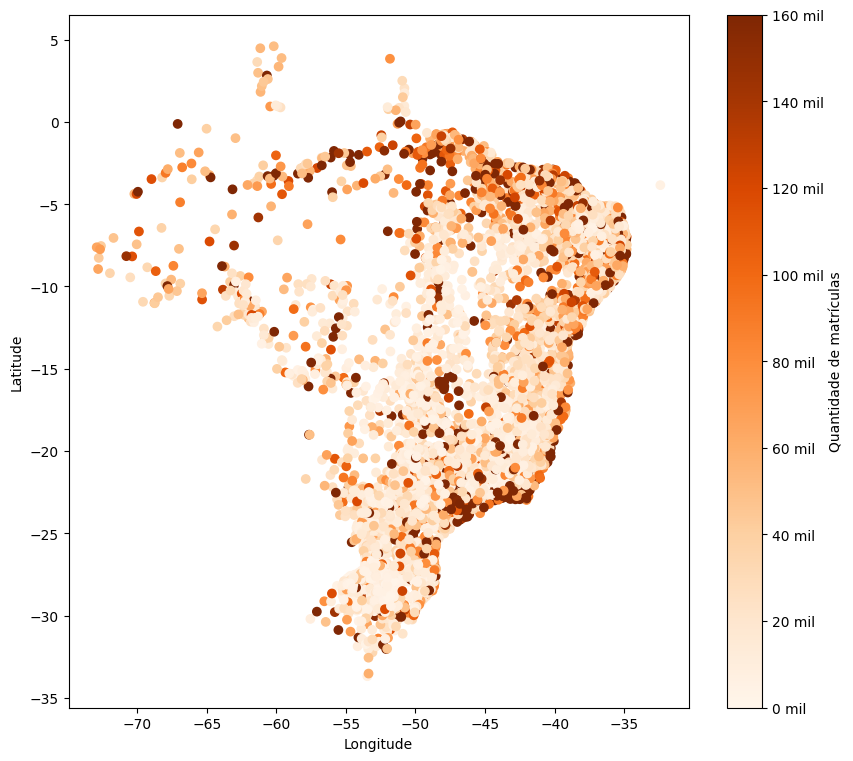

In [245]:
from matplotlib.ticker import FuncFormatter

# Função para formatar os números na legenda
def formatar_legenda(valor, pos):
    return f'{valor/1000:.0f} mil'

# Crie a figura e o gráfico de dispersão
fig, ax = plt.subplots(figsize=(10, 9))
scatter = ax.scatter(y=df_unique['latitude'], x=df_unique['longitude'],
                     c=df_unique['QT_MAT_BAS_TOTAL'], cmap='Oranges', vmin=0, vmax=160000)

# Adicione rótulos aos eixos
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adicione a legenda formatada
formatter = FuncFormatter(formatar_legenda)
cbar = plt.colorbar(scatter, format=formatter)
cbar.set_label('Quantidade de matrículas')

# Exiba o gráfico
plt.show()

In [246]:
# Contar quantas entradas têm 'QT_MAT_BAS_TOTAL' maior que 20000
br_count_above_100000 = (df_unique['QT_MAT_BAS_TOTAL'] > 160000).sum()

print("Número de entradas com QT_MAT_BAS_TOTAL maior que 100000 no brasil:", br_count_above_100000)

Número de entradas com QT_MAT_BAS_TOTAL maior que 100000 no brasil: 472


In [220]:
# Contar quantas entradas têm 'QT_MAT_BAS_TOTAL' maior que 20000
br_count_0 = (df_unique['QT_MAT_BAS_TOTAL'] == 0).sum()

print("Número de entradas com QT_MAT_BAS_TOTAL zeradas no brasil:", br_count_0)

Número de entradas com QT_MAT_BAS_TOTAL zeradas no brasil: 0


In [226]:
df_unique_ano = df.groupby(['NO_MUNICIPIO', 'NU_ANO_CENSO']).agg({'QT_MAT_BAS': 'sum', 'latitude': 'first', 'longitude': 'first', 'CO_REGIAO': 'first'}).reset_index()

# Renomear a coluna resultante para 'Soma_QT_MAT_BAS'
df_unique_ano = df_unique_ano.rename(columns={'QT_MAT_BAS': 'QT_MAT_BAS_TOTAL'})

# Agora 'df_unique_ano' contém a soma de 'QT_MAT_BAS' para cada 'NO_MUNICIPIO' por ano

df_unique_ano

NO_MUNICIPIO  NU_ANO_CENSO  QT_MAT_BAS_TOTAL  latitude  longitude  \
0      Abadia de Goiás          2014            2344.0  -16.7573   -49.4412   
1      Abadia de Goiás          2015            2458.0  -16.7573   -49.4412   
2      Abadia de Goiás          2016            2738.0  -16.7573   -49.4412   
3      Abadia de Goiás          2017            2890.0  -16.7573   -49.4412   
4      Abadia de Goiás          2018            3333.0  -16.7573   -49.4412   
...                ...           ...               ...       ...        ...   
47668             Óleo          2018             559.0  -22.9435   -49.3419   
47669             Óleo          2019             517.0  -22.9435   -49.3419   
47670             Óleo          2020             506.0  -22.9435   -49.3419   
47671             Óleo          2021             463.0  -22.9435   -49.3419   
47672             Óleo          2022             487.0  -22.9435   -49.3419   

       CO_REGIAO  
0              5  
1              5  
2              5  
3              5  
4              5  
...          ...  
47668          3  
47669          3  
47670          3  
47671          3  
47672          3  

[47673 rows x 6 columns]

In [225]:
# Supondo que 'df_unique' seja o DataFrame após o processamento anterior
# Coloque aqui o código para carregar ou criar o DataFrame 'df_unique'

# Dividir os dados em subdatasets baseados em 'CO_REGIAO'
anos_subdatasets = []

for group_id, group_data in df_unique_ano.groupby('NU_ANO_CENSO'):
    anos_subdatasets.append(group_data.copy())

# Agora 'subdatasets' é uma lista contendo 5 DataFrames divididos por 'CO_REGIAO'

# Exemplo de acesso a um dos subdatasets, por exemplo, o primeiro
subdataset_2014 = anos_subdatasets[0]
subdataset_2015 = anos_subdatasets[1]
subdataset_2016 = anos_subdatasets[2]
subdataset_2017 = anos_subdatasets[3]
subdataset_2018 = anos_subdatasets[4]
subdataset_2019 = anos_subdatasets[5]
subdataset_2020 = anos_subdatasets[6]
subdataset_2021 = anos_subdatasets[7]
subdataset_2022 = anos_subdatasets[8]

<Axes: title={'center': '2022'}, xlabel='longitude', ylabel='latitude'>

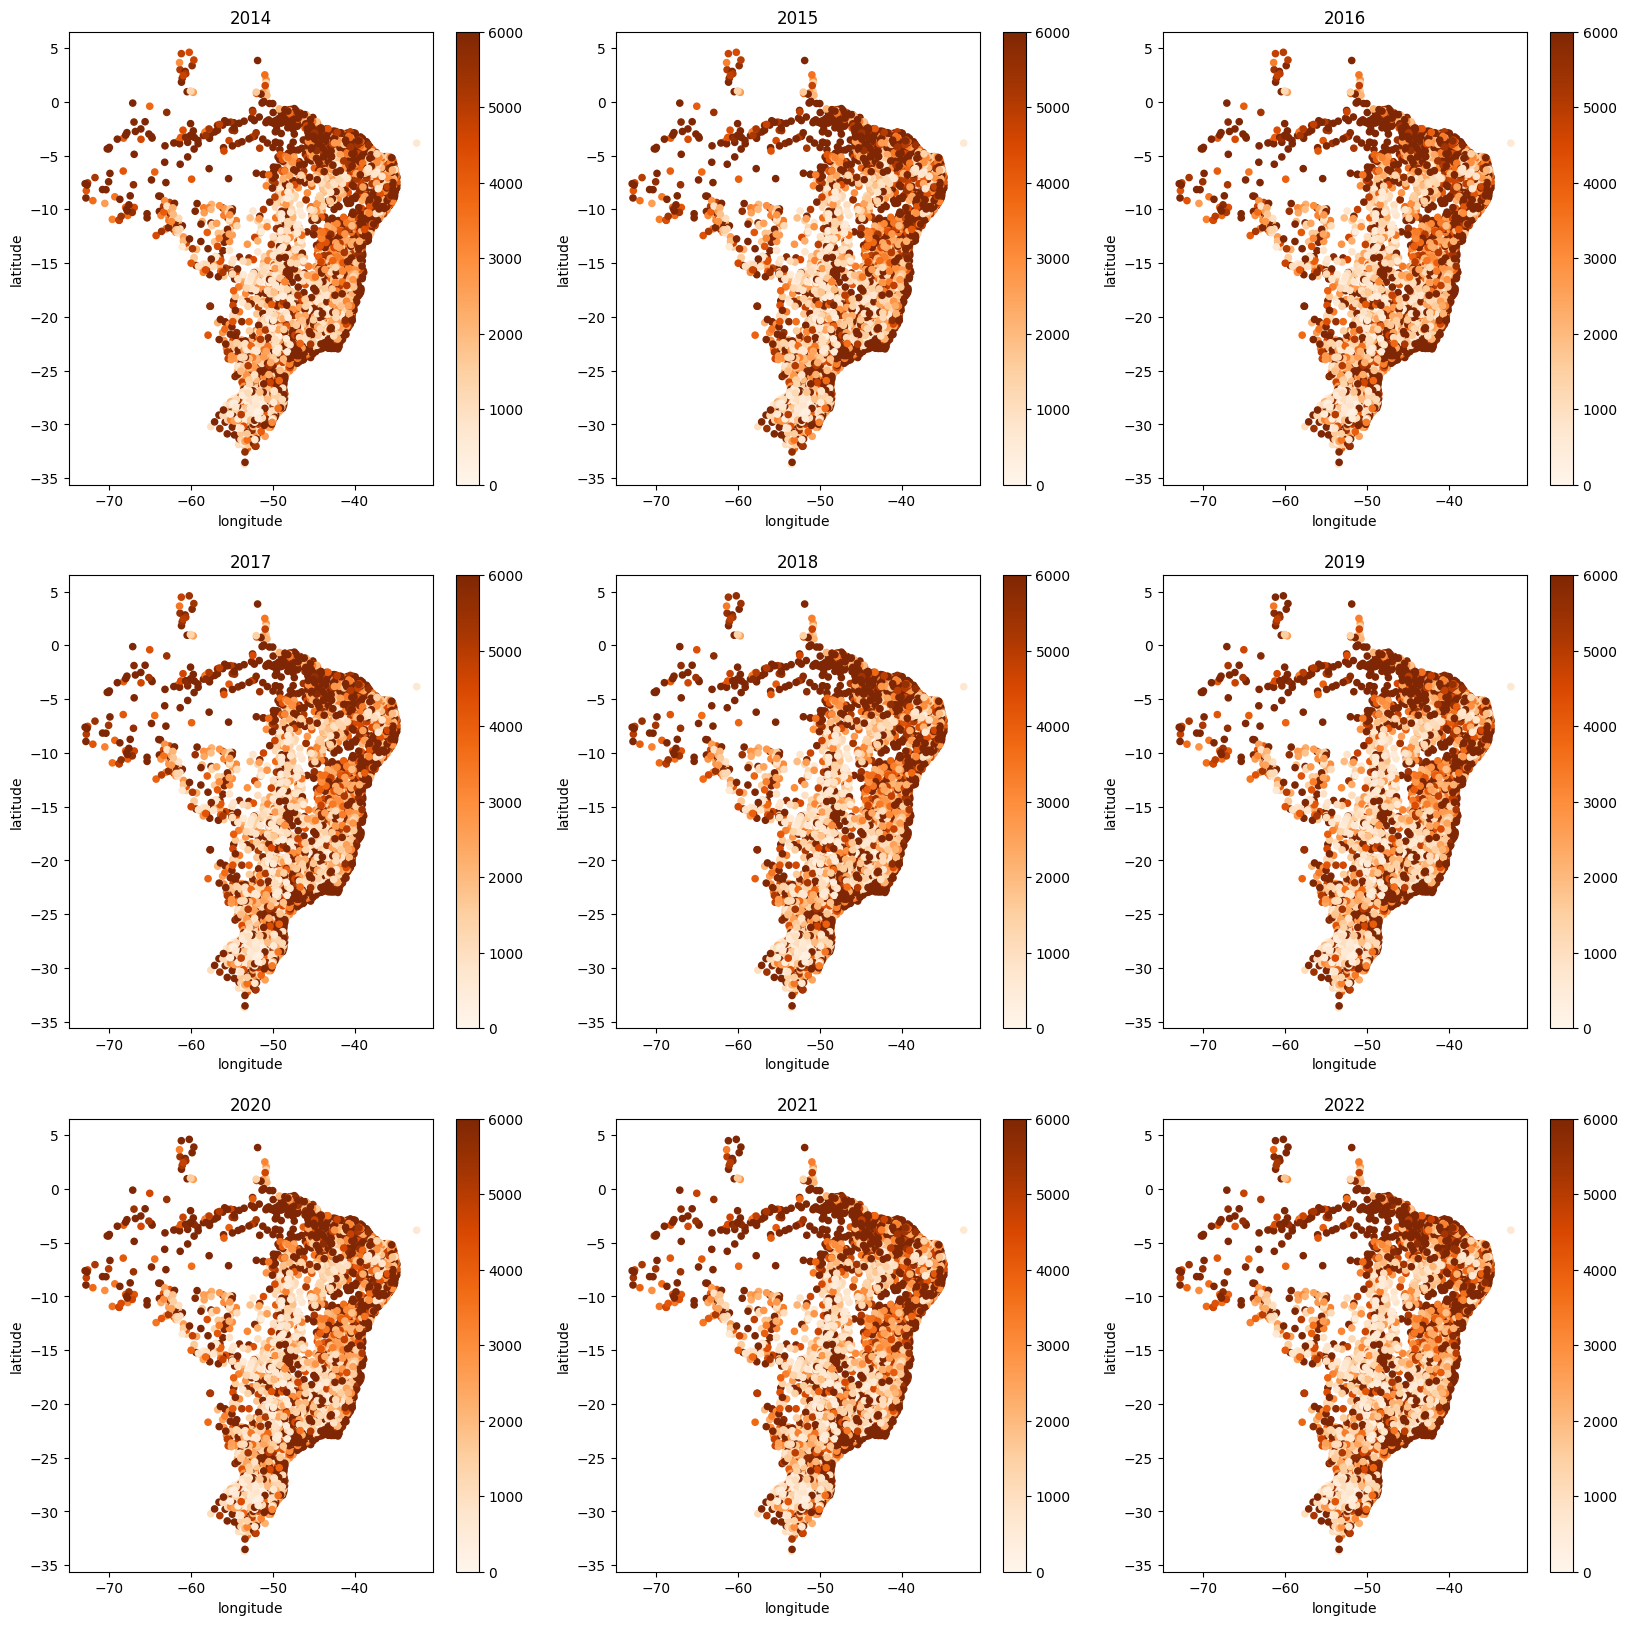

In [253]:
fig, ax = plt.subplots(3,3, figsize=(20,20))

max = 6000

subdataset_2014.plot.scatter(y='latitude',x='longitude',
                       c=subdataset_2014['QT_MAT_BAS_TOTAL'],
                       cmap='Oranges',
                       vmin=0,vmax=max,
                       ax=ax[0,0],title='2014')

subdataset_2015.plot.scatter(y='latitude',x='longitude',
                          c=subdataset_2015['QT_MAT_BAS_TOTAL'],                            
                            cmap='Oranges',
                            vmin=0,vmax=max,
                            ax=ax[0,1],title='2015')

subdataset_2016.plot.scatter(y='latitude',x='longitude',
                            c=subdataset_2016['QT_MAT_BAS_TOTAL'],
                            cmap='Oranges',
                            vmin=0,vmax=max,
                            ax=ax[0,2],title='2016')

subdataset_2017.plot.scatter(y='latitude',x='longitude',
                            c=subdataset_2017['QT_MAT_BAS_TOTAL'],
                            cmap='Oranges',
                            vmin=0,vmax=max,
                            ax=ax[1,0],title='2017')

subdataset_2018.plot.scatter(y='latitude',x='longitude',
                            c=subdataset_2018['QT_MAT_BAS_TOTAL']
                            ,cmap='Oranges',
                            vmin=0,vmax=max,
                            ax=ax[1,1],title='2018')

subdataset_2019.plot.scatter(y='latitude',x='longitude',
                            c=subdataset_2019['QT_MAT_BAS_TOTAL']
                            ,cmap='Oranges',
                            vmin=0,vmax=max,
                            ax=ax[1,2],title='2019')

subdataset_2020.plot.scatter(y='latitude',x='longitude',
                            c=subdataset_2020['QT_MAT_BAS_TOTAL'],
                            cmap='Oranges',
                            vmin=0,vmax=max,
                            ax=ax[2,0],title='2020')

subdataset_2021.plot.scatter(y='latitude',x='longitude',
                            c=subdataset_2021['QT_MAT_BAS_TOTAL']
                            ,cmap='Oranges',
                            vmin=0,vmax=max,
                            ax=ax[2,1],title='2021')

subdataset_2022.plot.scatter(y='latitude',x='longitude',
                            c=subdataset_2022['QT_MAT_BAS_TOTAL']
                            ,cmap='Oranges',
                            vmin=0,vmax=max,
                            ax=ax[2,2],title='2022')
                        

In [162]:
# Contar quantas entradas têm 'QT_MAT_BAS_TOTAL' maior que 20000
count_above_20000 = (df_unique['QT_MAT_BAS_TOTAL'] > 6000).sum()

print("Número de entradas com QT_MAT_BAS_TOTAL maior que 6000:", count_above_20000)

Número de entradas com QT_MAT_BAS_TOTAL maior que 6000: 4797


In [169]:
# Supondo que 'df_unique' seja o DataFrame após o processamento anterior
# Coloque aqui o código para carregar ou criar o DataFrame 'df_unique'

# Dividir os dados em subdatasets baseados em 'CO_REGIAO'
subdatasets = []

for group_id, group_data in df_unique.groupby('CO_REGIAO'):
    subdatasets.append(group_data.copy())

# Agora 'subdatasets' é uma lista contendo 5 DataFrames divididos por 'CO_REGIAO'

# Exemplo de acesso a um dos subdatasets, por exemplo, o primeiro
subdataset_norte = subdatasets[0]
subdataset_nordeste = subdatasets[1]
subdataset_sudeste = subdatasets[2]
subdataset_sul = subdatasets[3]
subdataset_centro_oeste = subdatasets[4]

NU_ANO_CENSO NO_REGIAO  CO_REGIAO     NO_UF SG_UF  CO_UF  \
29146            2014  Nordeste          2  Maranhão    MA     21   
29270            2014  Nordeste          2  Maranhão    MA     21   
29293            2014  Nordeste          2  Maranhão    MA     21   
29326            2014  Nordeste          2  Maranhão    MA     21   
29407            2014  Nordeste          2  Maranhão    MA     21   
...               ...       ...        ...       ...   ...    ...   
1971262          2022  Nordeste          2     Bahia    BA     29   
1971662          2022  Nordeste          2     Bahia    BA     29   
1971681          2022  Nordeste          2     Bahia    BA     29   
1971715          2022  Nordeste          2     Bahia    BA     29   
1971777          2022  Nordeste          2     Bahia    BA     29   

                  NO_MUNICIPIO  CO_MUNICIPIO  codigo_ibge  \
29146               Açailândia       2100055      2100055   
29270             Afonso Cunha       2100105      2100105   
29293    Água Doce do Maranhão       2100154      2100154   
29326                Alcântara       2100204      2100204   
29407            Aldeias Altas       2100303      2100303   
...                        ...           ...          ...   
1971262   Vitória da Conquista       2933307      2933307   
1971662                 Wagner       2933406      2933406   
1971681              Wanderley       2933455      2933455   
1971715    Wenceslau Guimarães       2933505      2933505   
1971777            Xique-Xique       2933604      2933604   

                          nome  latitude  longitude  capital  codigo_uf  \
29146               Açailândia  -4.94714   -47.5004        0         21   
29270             Afonso Cunha  -4.13631   -43.3275        0         21   
29293    Água Doce do Maranhão  -2.84048   -42.1189        0         21   
29326                Alcântara  -2.39574   -44.4062        0         21   
29407            Aldeias Altas  -4.62621   -43.4689        0         21   
...                        ...       ...        ...      ...        ...   
1971262   Vitória da Conquista -14.86150   -40.8442        0         29   
1971662                 Wagner -12.28190   -41.1715        0         29   
1971681              Wanderley -12.11440   -43.8958        0         29   
1971715    Wenceslau Guimarães -13.69080   -39.4762        0         29   
1971777            Xique-Xique -10.82300   -42.7245        0         29   

         siafi_id  ddd       fuso_horario  QT_MAT_BAS_TOTAL  
29146         961   99  America/Sao_Paulo            1620.0  
29270         701   98  America/Sao_Paulo            4051.0  
29293         104   98  America/Sao_Paulo             175.0  
29326         703   98  America/Sao_Paulo             511.0  
29407         705   99  America/Sao_Paulo             274.0  
...           ...  ...                ...               ...  
1971262      3965   77  America/Sao_Paulo             167.0  
1971662      3967   75  America/Sao_Paulo            4336.0  
1971681      3999   77  America/Sao_Paulo            4815.0  
1971715      3969   73  America/Sao_Paulo             354.0  
1971777      3971   74  America/Sao_Paulo             204.0  

[15381 rows x 18 columns]

## Região Norte

In [177]:
subdataset_norte

NU_ANO_CENSO NO_REGIAO  CO_REGIAO      NO_UF SG_UF  CO_UF  \
0                2014     Norte          1   Rondônia    RO     11   
66               2014     Norte          1   Rondônia    RO     11   
146              2014     Norte          1   Rondônia    RO     11   
154              2014     Norte          1   Rondônia    RO     11   
220              2014     Norte          1   Rondônia    RO     11   
...               ...       ...        ...        ...   ...    ...   
1891141          2022     Norte          1  Tocantins    TO     17   
1891185          2022     Norte          1  Tocantins    TO     17   
1891191          2022     Norte          1  Tocantins    TO     17   
1891196          2022     Norte          1  Tocantins    TO     17   
1891209          2022     Norte          1  Tocantins    TO     17   

                  NO_MUNICIPIO  CO_MUNICIPIO  codigo_ibge  \
0        Alta Floresta D'Oeste       1100015      1100015   
66                   Ariquemes       1100023      1100023   
146                     Cabixi       1100031      1100031   
154                     Cacoal       1100049      1100049   
220                 Cerejeiras       1100056      1100056   
...                        ...           ...          ...   
1891141         Tocantinópolis       1721208      1721208   
1891185               Tupirama       1721257      1721257   
1891191             Tupiratins       1721307      1721307   
1891196           Wanderlândia       1722081      1722081   
1891209                Xambioá       1722107      1722107   

                          nome  latitude  longitude  capital  codigo_uf  \
0        Alta Floresta D'Oeste -11.92830   -61.9953        0         11   
66                   Ariquemes  -9.90571   -63.0325        0         11   
146                     Cabixi -13.49450   -60.5520        0         11   
154                     Cacoal -11.43430   -61.4562        0         11   
220                 Cerejeiras -13.18700   -60.8168        0         11   
...                        ...       ...        ...      ...        ...   
1891141         Tocantinópolis  -6.32447   -47.4224        0         17   
1891185               Tupirama  -8.97168   -48.1883        0         17   
1891191             Tupiratins  -8.39388   -48.1277        0         17   
1891196           Wanderlândia  -6.85274   -47.9601        0         17   
1891209                Xambioá  -6.41410   -48.5320        0         17   

         siafi_id  ddd         fuso_horario  QT_MAT_BAS_TOTAL  
0              33   69  America/Porto_Velho              80.0  
66              7   69  America/Porto_Velho             689.0  
146            37   69  America/Porto_Velho             787.0  
154             9   69  America/Porto_Velho            1189.0  
220            27   69  America/Porto_Velho             223.0  
...           ...  ...                  ...               ...  
1891141      9621   63    America/Sao_Paulo            6066.0  
1891185       102   63    America/Sao_Paulo               0.0  
1891191       365   63    America/Sao_Paulo            2288.0  
1891196      9665   63    America/Sao_Paulo            1959.0  
1891209      9643   63    America/Sao_Paulo            1591.0  

[4032 rows x 18 columns]

Text(0, 0.5, 'Latitude')

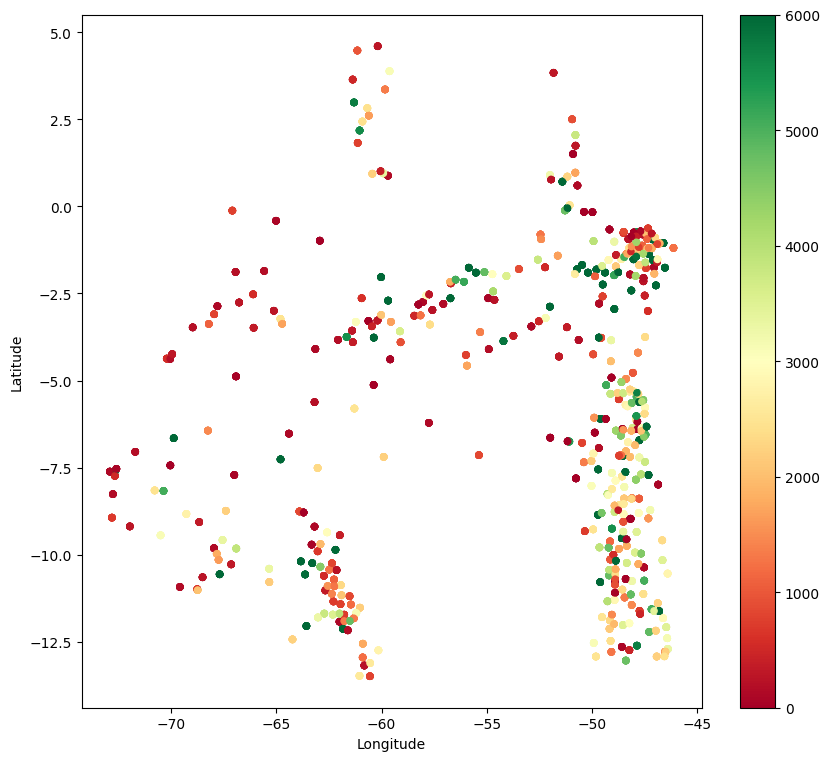

In [178]:
subdataset_norte.plot.scatter(y='latitude',x='longitude',
                       c=subdataset_norte['QT_MAT_BAS_TOTAL'],
                       cmap='RdYlGn',
                       figsize=(10,9),
                       vmin=0,vmax=6000)

# Adicionar rótulos aos eixos
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [179]:
# Contar quantas entradas têm 'QT_MAT_BAS_TOTAL' maior que 20000
nort_count_above_20000 = (subdataset_norte['QT_MAT_BAS_TOTAL'] > 6000).sum()

print("Número de entradas com QT_MAT_BAS_TOTAL maior que 6000 no Norte:", nort_count_above_20000)

Número de entradas com QT_MAT_BAS_TOTAL maior que 6000 no Norte: 396


## Nordeste

In [183]:
subdataset_nordeste

NU_ANO_CENSO NO_REGIAO  CO_REGIAO     NO_UF SG_UF  CO_UF  \
29146            2014  Nordeste          2  Maranhão    MA     21   
29270            2014  Nordeste          2  Maranhão    MA     21   
29293            2014  Nordeste          2  Maranhão    MA     21   
29326            2014  Nordeste          2  Maranhão    MA     21   
29407            2014  Nordeste          2  Maranhão    MA     21   
...               ...       ...        ...       ...   ...    ...   
1971262          2022  Nordeste          2     Bahia    BA     29   
1971662          2022  Nordeste          2     Bahia    BA     29   
1971681          2022  Nordeste          2     Bahia    BA     29   
1971715          2022  Nordeste          2     Bahia    BA     29   
1971777          2022  Nordeste          2     Bahia    BA     29   

                  NO_MUNICIPIO  CO_MUNICIPIO  codigo_ibge  \
29146               Açailândia       2100055      2100055   
29270             Afonso Cunha       2100105      2100105   
29293    Água Doce do Maranhão       2100154      2100154   
29326                Alcântara       2100204      2100204   
29407            Aldeias Altas       2100303      2100303   
...                        ...           ...          ...   
1971262   Vitória da Conquista       2933307      2933307   
1971662                 Wagner       2933406      2933406   
1971681              Wanderley       2933455      2933455   
1971715    Wenceslau Guimarães       2933505      2933505   
1971777            Xique-Xique       2933604      2933604   

                          nome  latitude  longitude  capital  codigo_uf  \
29146               Açailândia  -4.94714   -47.5004        0         21   
29270             Afonso Cunha  -4.13631   -43.3275        0         21   
29293    Água Doce do Maranhão  -2.84048   -42.1189        0         21   
29326                Alcântara  -2.39574   -44.4062        0         21   
29407            Aldeias Altas  -4.62621   -43.4689        0         21   
...                        ...       ...        ...      ...        ...   
1971262   Vitória da Conquista -14.86150   -40.8442        0         29   
1971662                 Wagner -12.28190   -41.1715        0         29   
1971681              Wanderley -12.11440   -43.8958        0         29   
1971715    Wenceslau Guimarães -13.69080   -39.4762        0         29   
1971777            Xique-Xique -10.82300   -42.7245        0         29   

         siafi_id  ddd       fuso_horario  QT_MAT_BAS_TOTAL  
29146         961   99  America/Sao_Paulo            1620.0  
29270         701   98  America/Sao_Paulo            4051.0  
29293         104   98  America/Sao_Paulo             175.0  
29326         703   98  America/Sao_Paulo             511.0  
29407         705   99  America/Sao_Paulo             274.0  
...           ...  ...                ...               ...  
1971262      3965   77  America/Sao_Paulo             167.0  
1971662      3967   75  America/Sao_Paulo            4336.0  
1971681      3999   77  America/Sao_Paulo            4815.0  
1971715      3969   73  America/Sao_Paulo             354.0  
1971777      3971   74  America/Sao_Paulo             204.0  

[15381 rows x 18 columns]

Text(0, 0.5, 'Latitude')

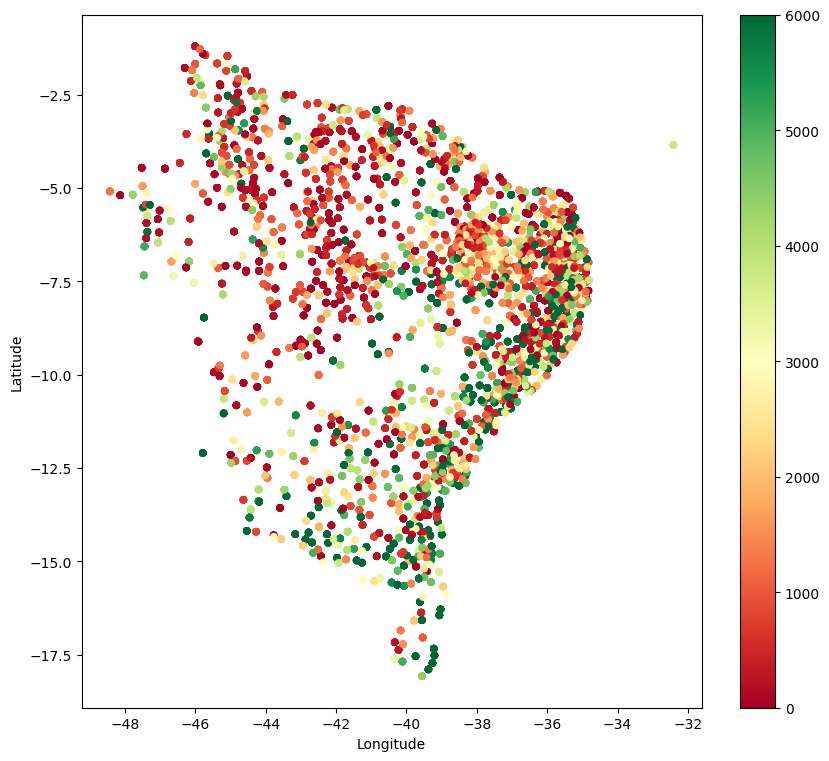

In [180]:
subdataset_nordeste.plot.scatter(y='latitude',x='longitude',
                       c=subdataset_nordeste['QT_MAT_BAS_TOTAL'],
                       cmap='RdYlGn',
                       figsize=(10,9),
                       vmin=0,vmax=6000)

# Adicionar rótulos aos eixos
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [182]:
# Contar quantas entradas têm 'QT_MAT_BAS_TOTAL' maior que 20000
nord_count_above_20000 = (subdataset_nordeste['QT_MAT_BAS_TOTAL'] > 6000).sum()

print("Número de entradas com QT_MAT_BAS_TOTAL maior que 6000 no Nordeste:", nord_count_above_20000)

Número de entradas com QT_MAT_BAS_TOTAL maior que 6000 no Nordeste: 1746


## Centro-Oeste

In [184]:
subdataset_centro_oeste

NU_ANO_CENSO     NO_REGIAO  CO_REGIAO               NO_UF SG_UF  \
231378           2014  Centro-Oeste          5  Mato Grosso do Sul    MS   
231388           2014  Centro-Oeste          5  Mato Grosso do Sul    MS   
231392           2014  Centro-Oeste          5  Mato Grosso do Sul    MS   
231418           2014  Centro-Oeste          5  Mato Grosso do Sul    MS   
231440           2014  Centro-Oeste          5  Mato Grosso do Sul    MS   
...               ...           ...        ...                 ...   ...   
2088270          2022  Centro-Oeste          5               Goiás    GO   
2088284          2022  Centro-Oeste          5               Goiás    GO   
2088289          2022  Centro-Oeste          5               Goiás    GO   
2088296          2022  Centro-Oeste          5               Goiás    GO   
2088303          2022  Centro-Oeste          5    Distrito Federal    DF   

         CO_UF    NO_MUNICIPIO  CO_MUNICIPIO  codigo_ibge            nome  \
231378      50      Água Clara       5000203      5000203      Água Clara   
231388      50     Alcinópolis       5000252      5000252     Alcinópolis   
231392      50         Amambai       5000609      5000609         Amambai   
231418      50       Anastácio       5000708      5000708       Anastácio   
231440      50    Anaurilândia       5000807      5000807    Anaurilândia   
...        ...             ...           ...          ...             ...   
2088270     52      Vianópolis       5222005      5222005      Vianópolis   
2088284     52  Vicentinópolis       5222054      5222054  Vicentinópolis   
2088289     52        Vila Boa       5222203      5222203        Vila Boa   
2088296     52   Vila Propício       5222302      5222302   Vila Propício   
2088303     53        Brasília       5300108      5300108        Brasília   

         latitude  longitude  capital  codigo_uf  siafi_id  ddd  \
231378   -20.4452   -52.8790        0         50      9003   67   
231388   -18.3255   -53.7042        0         50       141   67   
231392   -23.1058   -55.2253        0         50      9011   67   
231418   -20.4823   -55.8104        0         50      9013   67   
231440   -22.1852   -52.7191        0         50      9015   67   
...           ...        ...      ...        ...       ...  ...   
2088270  -16.7405   -48.5159        0         52      9641   62   
2088284  -17.7322   -49.8047        0         52      9657   64   
2088289  -15.0387   -47.0520        0         52        67   61   
2088296  -15.4542   -48.8819        0         52      1068   62   
2088303  -15.7795   -47.9297        1         53      9701   61   

                fuso_horario  QT_MAT_BAS_TOTAL  
231378   America/Porto_Velho            7883.0  
231388   America/Porto_Velho            2741.0  
231392   America/Porto_Velho            2399.0  
231418   America/Porto_Velho            3212.0  
231440   America/Porto_Velho            1409.0  
...                      ...               ...  
2088270    America/Sao_Paulo            3536.0  
2088284    America/Sao_Paulo            1479.0  
2088289    America/Sao_Paulo            2602.0  
2088296    America/Sao_Paulo            3061.0  
2088303    America/Sao_Paulo               0.0  

[3879 rows x 18 columns]

Text(0, 0.5, 'Latitude')

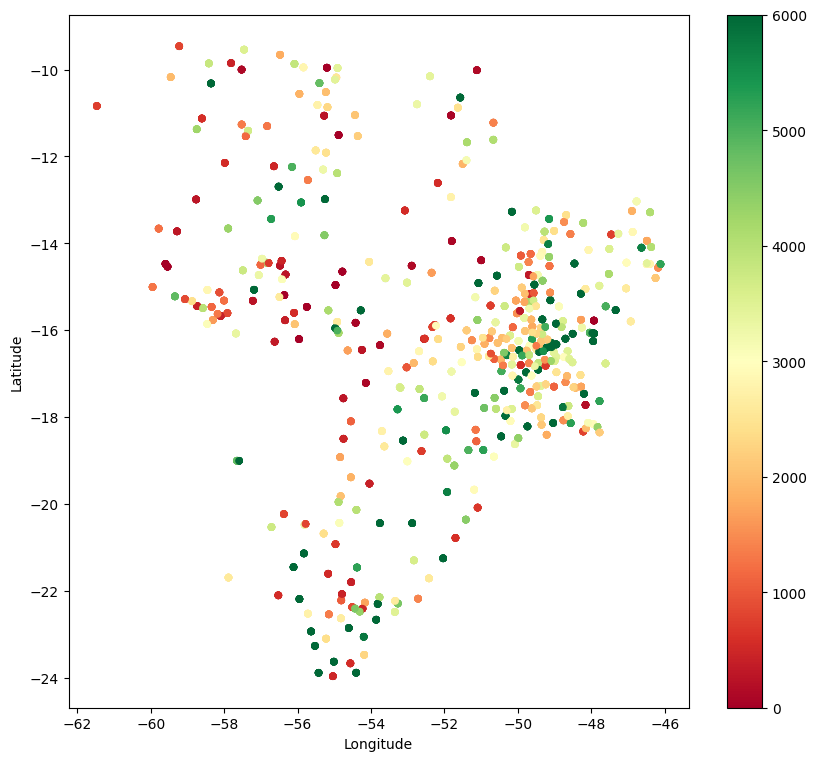

In [185]:
subdataset_centro_oeste.plot.scatter(y='latitude',x='longitude',
                       c=subdataset_centro_oeste['QT_MAT_BAS_TOTAL'],
                       cmap='RdYlGn',
                       figsize=(10,9),
                       vmin=0,vmax=6000)

# Adicionar rótulos aos eixos
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [186]:
# Contar quantas entradas têm 'QT_MAT_BAS_TOTAL' maior que 20000
centro_count_above_20000 = (subdataset_centro_oeste['QT_MAT_BAS_TOTAL'] > 6000).sum()

print("Número de entradas com QT_MAT_BAS_TOTAL maior que 6000 no Centro-Oeste:", centro_count_above_20000)

Número de entradas com QT_MAT_BAS_TOTAL maior que 6000 no Centro-Oeste: 441


## Sudeste

In [191]:
subdataset_sudeste

NU_ANO_CENSO NO_REGIAO  CO_REGIAO         NO_UF SG_UF  CO_UF  \
124569           2014   Sudeste          3  Minas Gerais    MG     31   
124578           2014   Sudeste          3  Minas Gerais    MG     31   
124600           2014   Sudeste          3  Minas Gerais    MG     31   
124637           2014   Sudeste          3  Minas Gerais    MG     31   
124648           2014   Sudeste          3  Minas Gerais    MG     31   
...               ...       ...        ...           ...   ...    ...   
2048218          2022   Sudeste          3     São Paulo    SP     35   
2048304          2022   Sudeste          3     São Paulo    SP     35   
2048371          2022   Sudeste          3     São Paulo    SP     35   
2048375          2022   Sudeste          3     São Paulo    SP     35   
2048388          2022   Sudeste          3     São Paulo    SP     35   

                NO_MUNICIPIO  CO_MUNICIPIO  codigo_ibge                 nome  \
124569   Abadia dos Dourados       3100104      3100104  Abadia dos Dourados   
124578                Abaeté       3100203      3100203               Abaeté   
124600            Abre Campo       3100302      3100302           Abre Campo   
124637               Acaiaca       3100401      3100401              Acaiaca   
124648               Açucena       3100500      3100500              Açucena   
...                      ...           ...          ...                  ...   
2048218           Votorantim       3557006      3557006           Votorantim   
2048304          Votuporanga       3557105      3557105          Votuporanga   
2048371             Zacarias       3557154      3557154             Zacarias   
2048375            Chavantes       3557204      3557204            Chavantes   
2048388         Estiva Gerbi       3557303      3557303         Estiva Gerbi   

         latitude  longitude  capital  codigo_uf  siafi_id  ddd  \
124569   -18.4831   -47.3916        0         31      4001   34   
124578   -19.1551   -45.4444        0         31      4003   37   
124600   -20.2996   -42.4743        0         31      4005   31   
124637   -20.3590   -43.1439        0         31      4007   31   
124648   -19.0671   -42.5419        0         31      4009   33   
...           ...        ...      ...        ...       ...  ...   
2048218  -23.5446   -47.4388        0         35      7243   15   
2048304  -20.4237   -49.9781        0         35      7245   17   
2048371  -21.0506   -50.0552        0         35      2973   18   
2048375  -23.0366   -49.7096        0         35      6337   14   
2048388  -22.2713   -46.9481        0         35      2959   19   

              fuso_horario  QT_MAT_BAS_TOTAL  
124569   America/Sao_Paulo              58.0  
124578   America/Sao_Paulo            2612.0  
124600   America/Sao_Paulo            1746.0  
124637   America/Sao_Paulo            2947.0  
124648   America/Sao_Paulo            5812.0  
...                    ...               ...  
2048218  America/Sao_Paulo            3790.0  
2048304  America/Sao_Paulo            3808.0  
2048371  America/Sao_Paulo            1574.0  
2048375  America/Sao_Paulo            4080.0  
2048388  America/Sao_Paulo            1682.0  

[14544 rows x 18 columns]

Text(0, 0.5, 'Latitude')

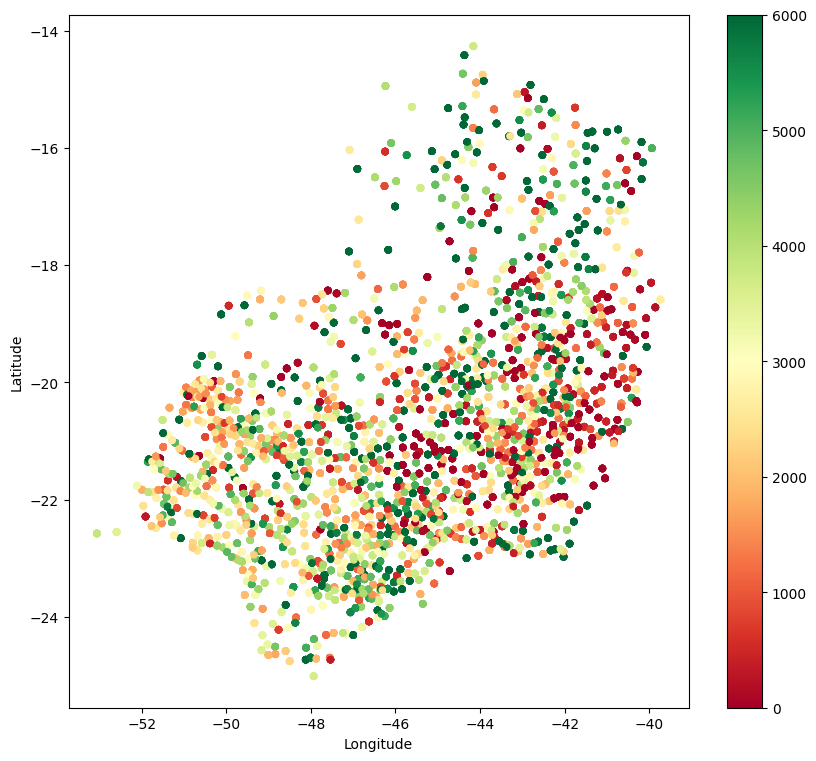

In [192]:
subdataset_sudeste.plot.scatter(y='latitude',x='longitude',
                       c=subdataset_sudeste['QT_MAT_BAS_TOTAL'],
                       cmap='RdYlGn',
                       figsize=(10,9),
                       vmin=0,vmax=6000)

# Adicionar rótulos aos eixos
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [190]:
# Contar quantas entradas têm 'QT_MAT_BAS_TOTAL' maior que 20000
sudeste_count_above_20000 = (subdataset_sudeste['QT_MAT_BAS_TOTAL'] > 6000).sum()

print("Número de entradas com QT_MAT_BAS_TOTAL maior que 6000 no sudeste:", sudeste_count_above_20000)

Número de entradas com QT_MAT_BAS_TOTAL maior que 6000 no sudeste: 1953


## Sul

In [188]:
subdataset_sul

NU_ANO_CENSO NO_REGIAO  CO_REGIAO              NO_UF SG_UF  CO_UF  \
201212           2014       Sul          4             Paraná    PR     41   
201222           2014       Sul          4             Paraná    PR     41   
201251           2014       Sul          4             Paraná    PR     41   
201274           2014       Sul          4             Paraná    PR     41   
201359           2014       Sul          4             Paraná    PR     41   
...               ...       ...        ...                ...   ...    ...   
2077565          2022       Sul          4  Rio Grande do Sul    RS     43   
2077568          2022       Sul          4  Rio Grande do Sul    RS     43   
2077573          2022       Sul          4  Rio Grande do Sul    RS     43   
2077578          2022       Sul          4  Rio Grande do Sul    RS     43   
2077584          2022       Sul          4  Rio Grande do Sul    RS     43   

                  NO_MUNICIPIO  CO_MUNICIPIO  codigo_ibge  \
201212                  Abatiá       4100103      4100103   
201222            Adrianópolis       4100202      4100202   
201251           Agudos do Sul       4100301      4100301   
201274     Almirante Tamandaré       4100400      4100400   
201359      Altamira do Paraná       4100459      4100459   
...                        ...           ...          ...   
2077565  Vista Alegre do Prata       4323606      4323606   
2077568           Vista Gaúcha       4323705      4323705   
2077573    Vitória das Missões       4323754      4323754   
2077578              Westfália       4323770      4323770   
2077584              Xangri-lá       4323804      4323804   

                          nome  latitude  longitude  capital  codigo_uf  \
201212                  Abatiá  -23.3049   -50.3133        0         41   
201222            Adrianópolis  -24.6606   -48.9922        0         41   
201251           Agudos do Sul  -25.9899   -49.3343        0         41   
201274     Almirante Tamandaré  -25.3188   -49.3037        0         41   
201359      Altamira do Paraná  -24.7983   -52.7128        0         41   
...                        ...       ...        ...      ...        ...   
2077565  Vista Alegre do Prata  -28.8052   -51.7947        0         43   
2077568           Vista Gaúcha  -27.2902   -53.6974        0         43   
2077573    Vitória das Missões  -28.3516   -54.5040        0         43   
2077578              Westfália  -29.4263   -51.7645        0         43   
2077584              Xangri-lá  -29.8065   -50.0519        0         43   

         siafi_id  ddd       fuso_horario  QT_MAT_BAS_TOTAL  
201212       7401   43  America/Sao_Paulo            3054.0  
201222       7403   41  America/Sao_Paulo             120.0  
201251       7405   41  America/Sao_Paulo            1589.0  
201274       7407   41  America/Sao_Paulo            2605.0  
201359       8455   44  America/Sao_Paulo            3818.0  
...           ...  ...                ...               ...  
2077565      7305   54  America/Sao_Paulo            1050.0  
2077568      7303   55  America/Sao_Paulo             988.0  
2077573      6053   55  America/Sao_Paulo             605.0  
2077578      1176   51  America/Sao_Paulo             363.0  
2077584      5785   51  America/Sao_Paulo             597.0  

[9837 rows x 18 columns]

Text(0, 0.5, 'Latitude')

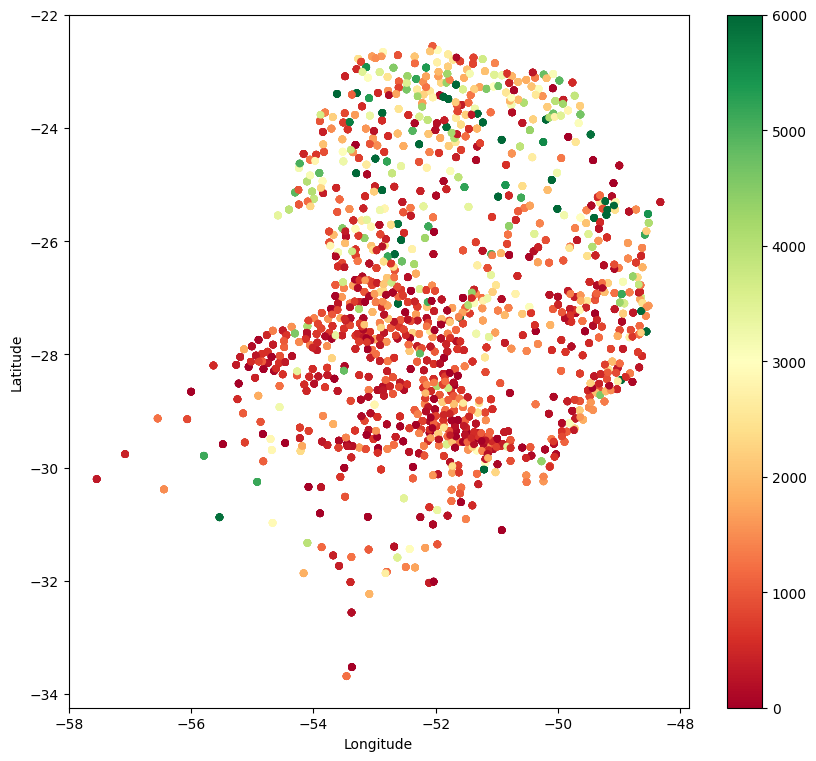

In [189]:
subdataset_sul.plot.scatter(y='latitude',x='longitude',
                       c=subdataset_sul['QT_MAT_BAS_TOTAL'],
                       cmap='RdYlGn',
                       figsize=(10,9),
                       vmin=0,vmax=6000)

# Adicionar rótulos aos eixos
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [187]:
# Contar quantas entradas têm 'QT_MAT_BAS_TOTAL' maior que 20000
sul_count_above_20000 = (subdataset_sul['QT_MAT_BAS_TOTAL'] > 6000).sum()

print("Número de entradas com QT_MAT_BAS_TOTAL maior que 6000 no sul:", sul_count_above_20000)

Número de entradas com QT_MAT_BAS_TOTAL maior que 6000 no sul: 261


<Axes: title={'center': 'Sul'}, xlabel='longitude', ylabel='latitude'>

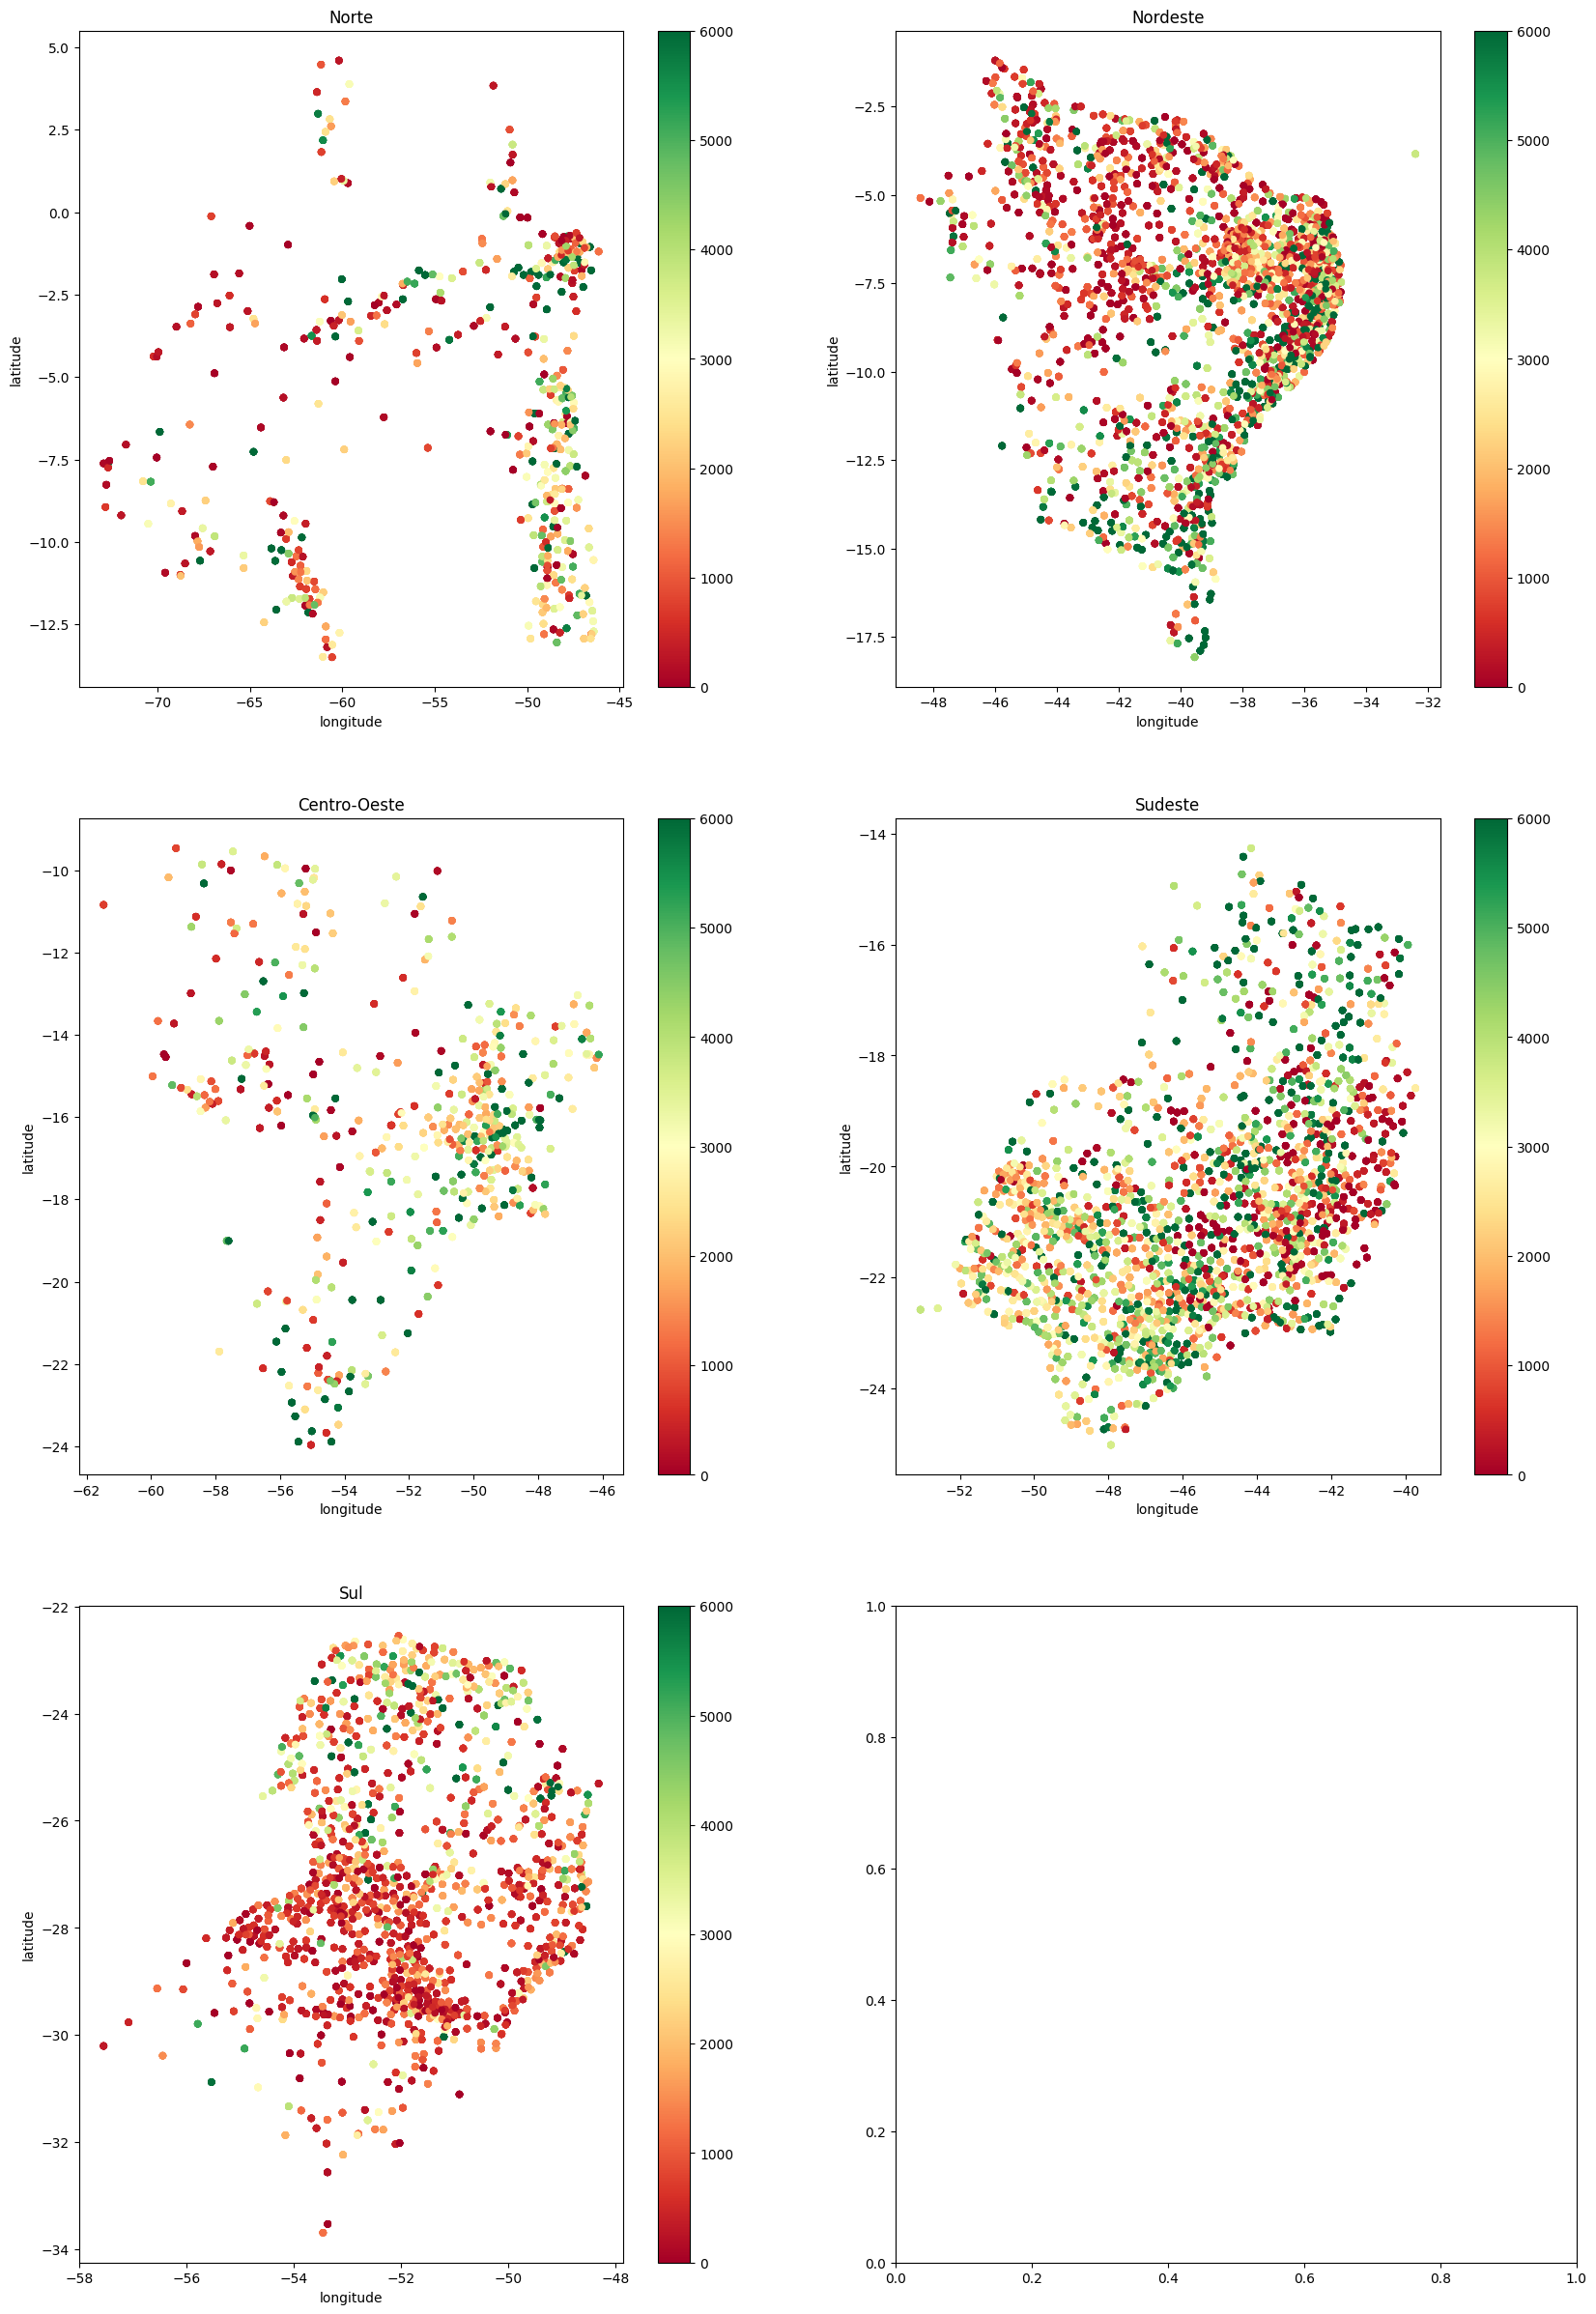

In [240]:
fig, ax = plt.subplots(3,2, figsize=(20,30))

subdataset_norte.plot.scatter(y='latitude',x='longitude',
                       c=subdataset_norte['QT_MAT_BAS_TOTAL'],
                       cmap='RdYlGn',
                       vmin=0,vmax=6000,
                       ax=ax[0,0],title='Norte')

subdataset_nordeste.plot.scatter(y='latitude',x='longitude',
                          c=subdataset_nordeste['QT_MAT_BAS_TOTAL'],                            
                            cmap='RdYlGn',
                            vmin=0,vmax=6000,
                            ax=ax[0,1],title='Nordeste')

subdataset_centro_oeste.plot.scatter(y='latitude',x='longitude',
                            c=subdataset_centro_oeste['QT_MAT_BAS_TOTAL'],
                            cmap='RdYlGn',
                            vmin=0,vmax=6000,
                            ax=ax[1,0],title='Centro-Oeste')

subdataset_sudeste.plot.scatter(y='latitude',x='longitude',
                            c=subdataset_sudeste['QT_MAT_BAS_TOTAL'],
                            cmap='RdYlGn',
                            vmin=0,vmax=6000,
                            ax=ax[1,1],title='Sudeste')

subdataset_sul.plot.scatter(y='latitude',x='longitude',
                            c=subdataset_sul['QT_MAT_BAS_TOTAL']
                            ,cmap='RdYlGn',
                            vmin=0,vmax=6000,
                            ax=ax[2,0
                            ],title='Sul')

                        